In [144]:
# Imports and auxiliaries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from IPython.display import display

# Regularisation constant
eps = 1e-10

# The different maps we consider with r the parameter
def maps(r, x, m):
    if (m == 'logistic'):
        return r * x * (1-x)
    elif (m == 'ren'):
        return np.abs(r*(1 - np.abs(x)**(0.5)))       

# The derivative of the maps in absolute value
def abs_der(r, x, m):
    if (m == 'logistic'):
        return r*np.abs(1-2*x)
    elif (m == 'ren'):
        return r/(2*np.sqrt(np.abs(x)+eps))    

# The lambda parameter determination for the ren map
def lambda_from_scaled_area(x):
    return x / (1-np.sqrt(x))

# The equation for the fixed points of the ren map
def fixed_points(r, sign = -1):
    return r*(1 + (r + sign * np.sqrt(r*(r+4))) / 2)

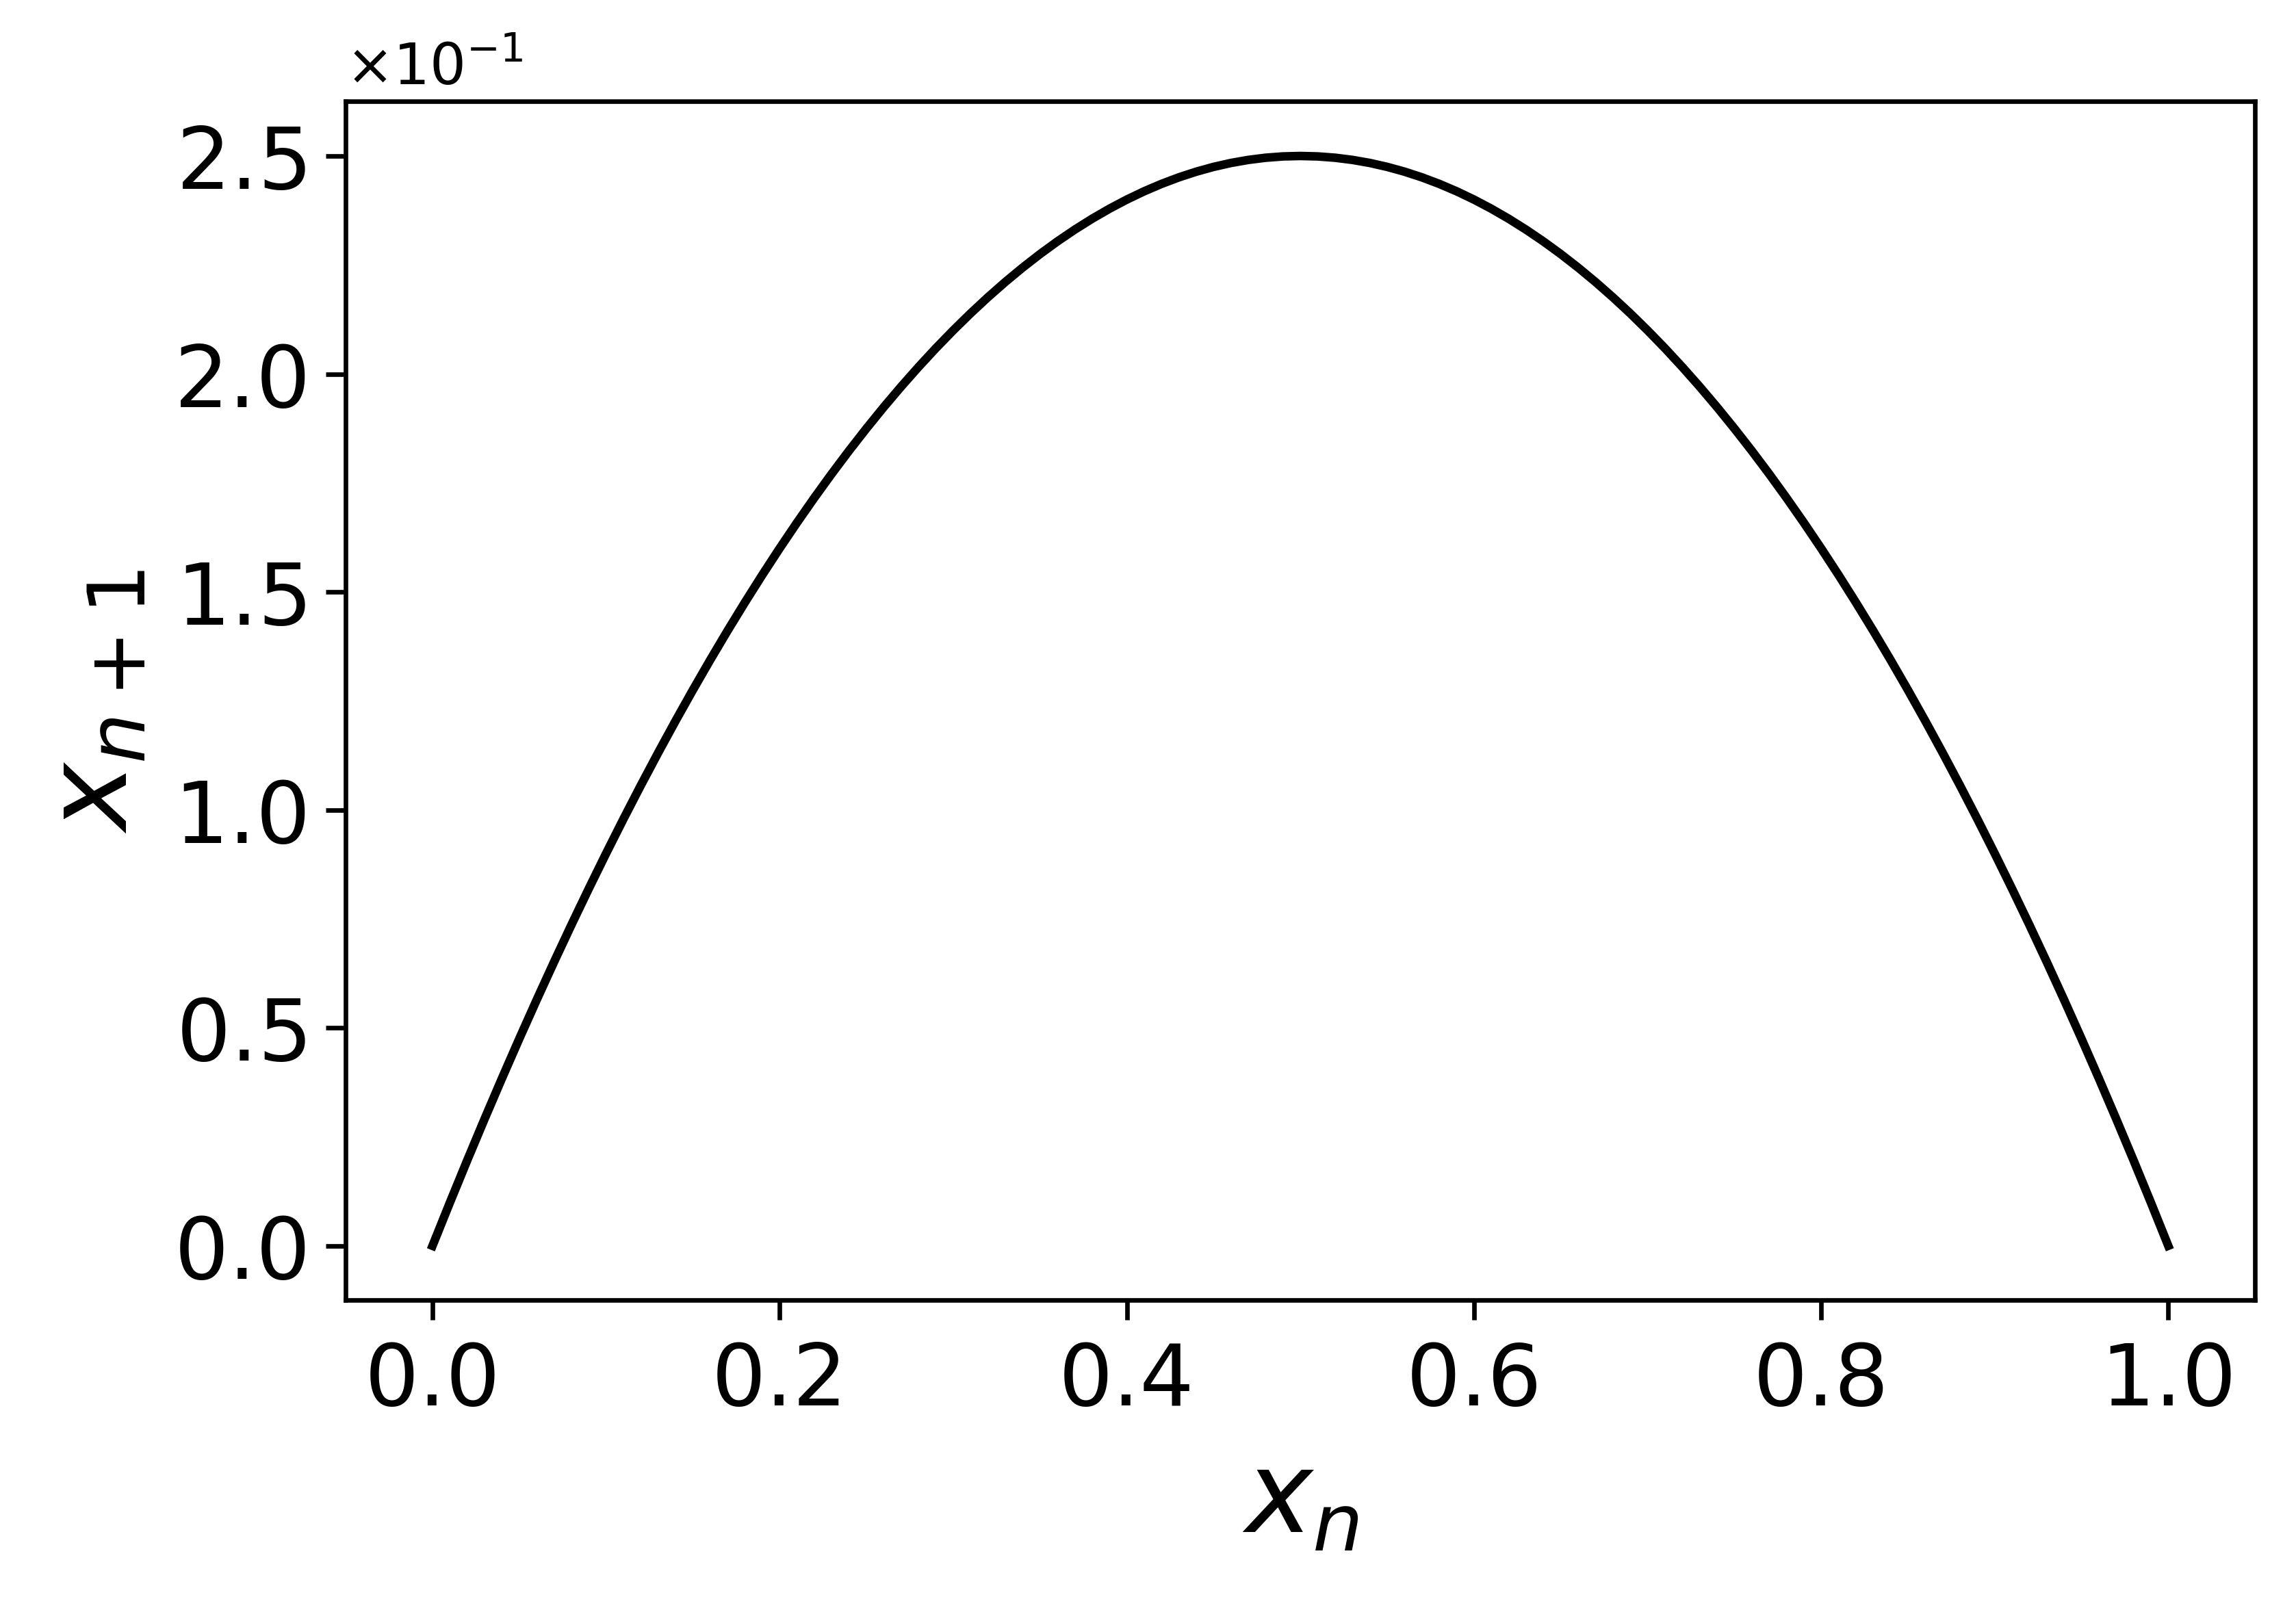

In [145]:
dpi = 600
m = 'logistic'

# Plotting the logistic map iteration function
plt.figure(dpi=dpi)
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.plot(np.linspace(0, 1, 101),
         np.array([maps(1, x, m) for x in np.linspace(0, 1, 101)]), c = 'k')
plt.xlabel('$x_{n}$', fontsize=20)
plt.ylabel('$x_{n+1}$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('1a.pdf', bbox_inches = 'tight', pad_inches = 0)

In [146]:
# Determining the bifurcations and Lyapunov exponent
bifurcations = []
Lyapunov_exponent = []
for r in np.linspace(0, 4, 401):
    x = np.random.uniform(0, 1)
    for n in range(900):
        x = maps(r, x, m)
    s = 0
    for n in range(100):
        s += np.log(abs_der(r, x, m)+eps)
        x = maps(r, x, m)
        bifurcations.append([r, x])
    Lyapunov_exponent.append([r, s/100])

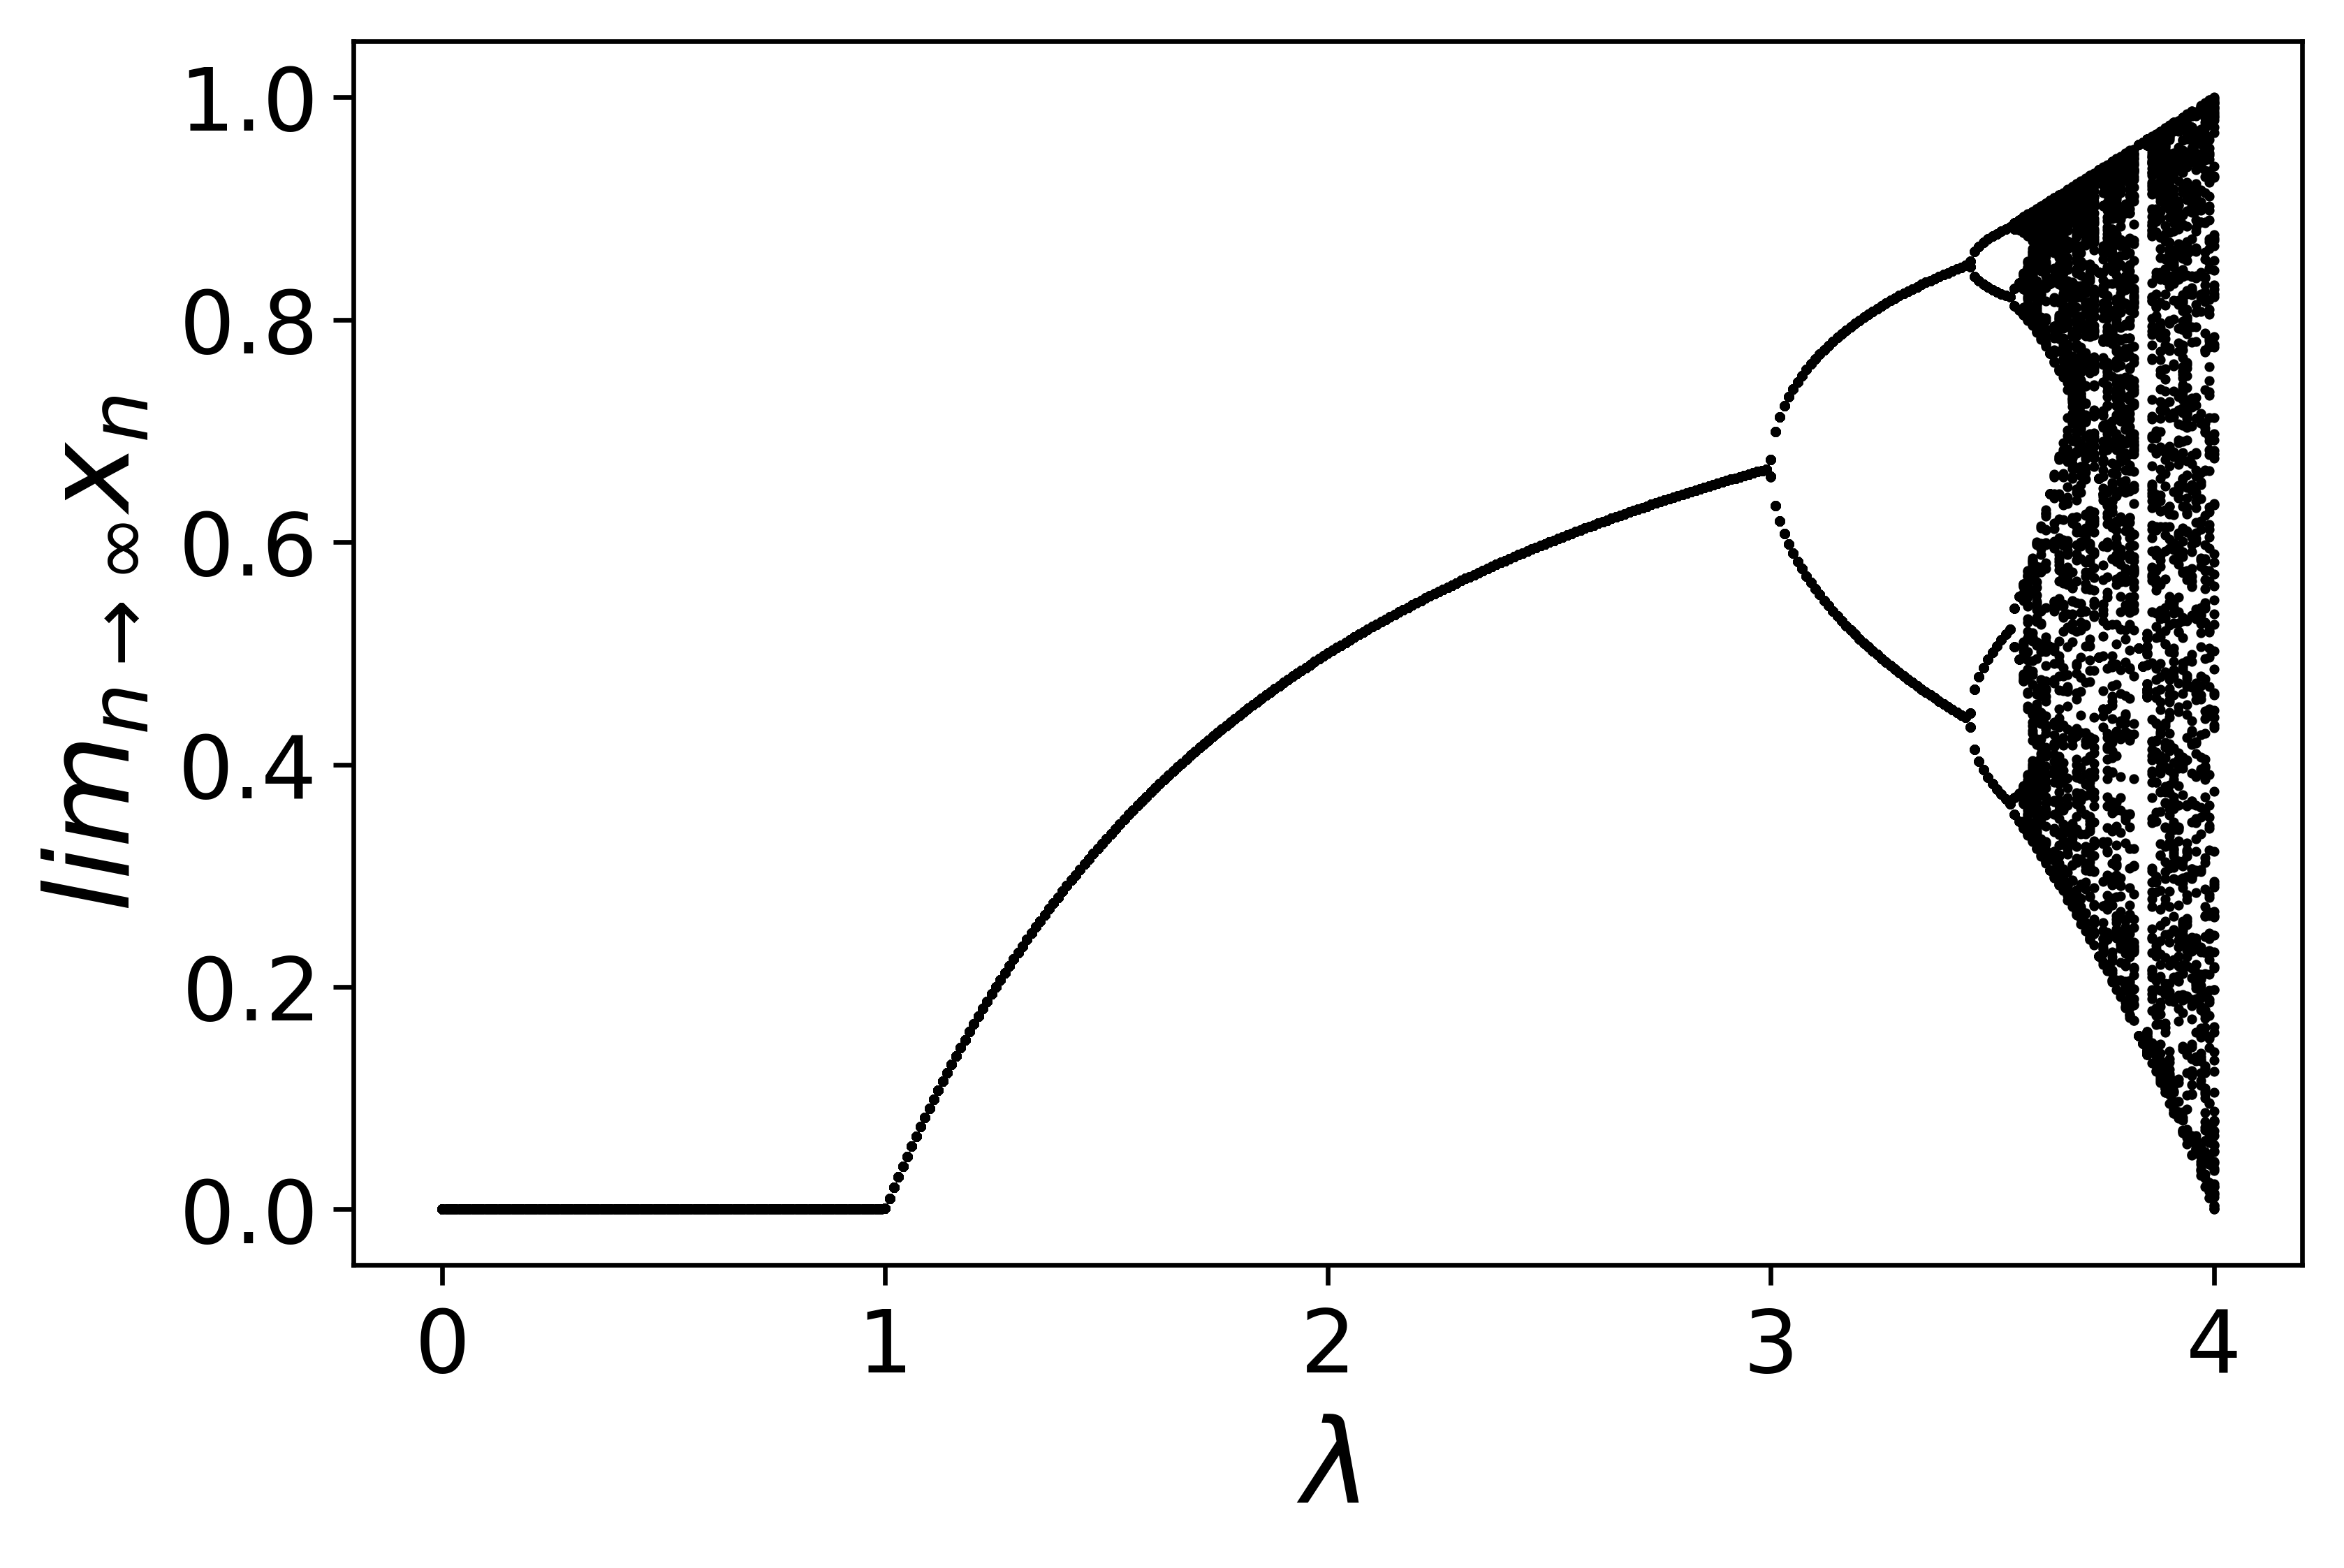

In [147]:
# Plotting the bifurcation diagram for the logistic map
plt.figure(dpi=dpi)
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.scatter(*zip(*bifurcations), c = 'k', s = 0.5)
plt.xlabel('$\lambda$', fontsize=20)
plt.ylabel('$lim_{n \\rightarrow \infty} x_{n}$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('1c.pdf', bbox_inches = 'tight', pad_inches = 0)

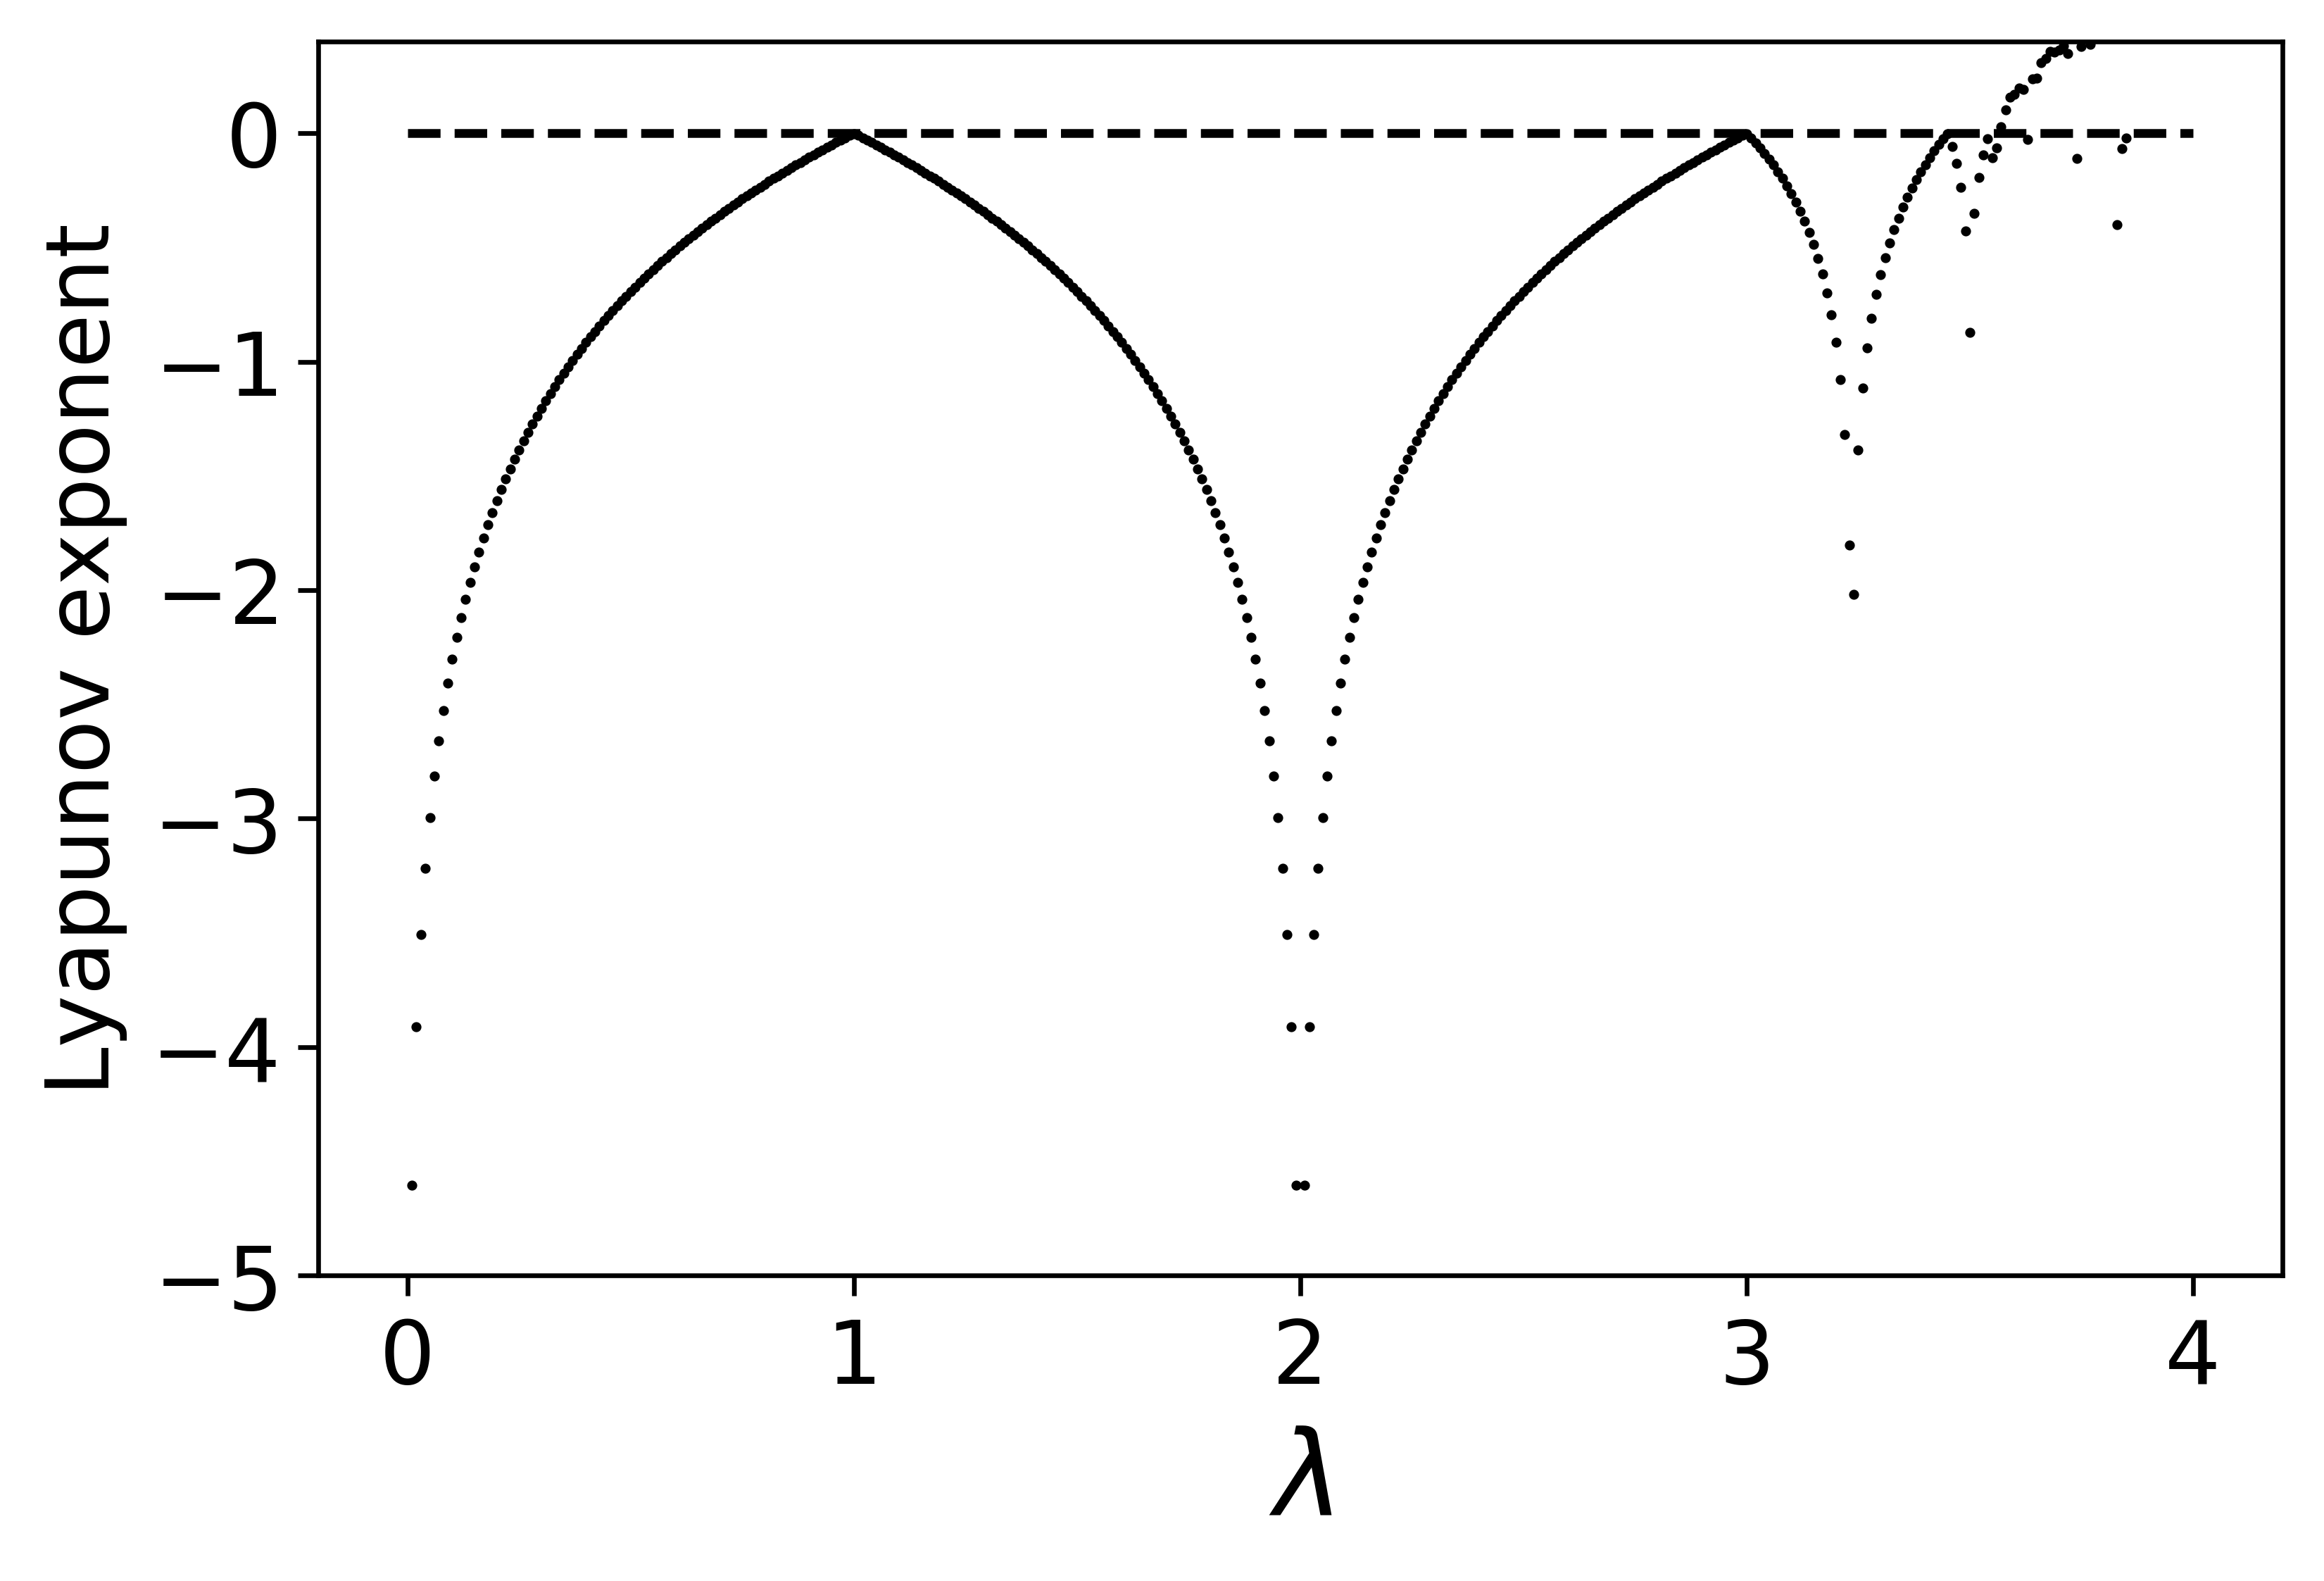

In [148]:
# Plotting the Lyapunov exponent for the logistic map
plt.figure(dpi=dpi)
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.scatter(*zip(*Lyapunov_exponent), c = 'k', s = 0.5)
plt.plot(np.linspace(0, 4, 201), np.zeros(201), c = 'k', linestyle = '--')
plt.ylim(-5, 0.4)
plt.xlabel('$\lambda$', fontsize=20)
plt.ylabel('Lyapunov exponent', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('1e.pdf', bbox_inches = 'tight', pad_inches = 0)

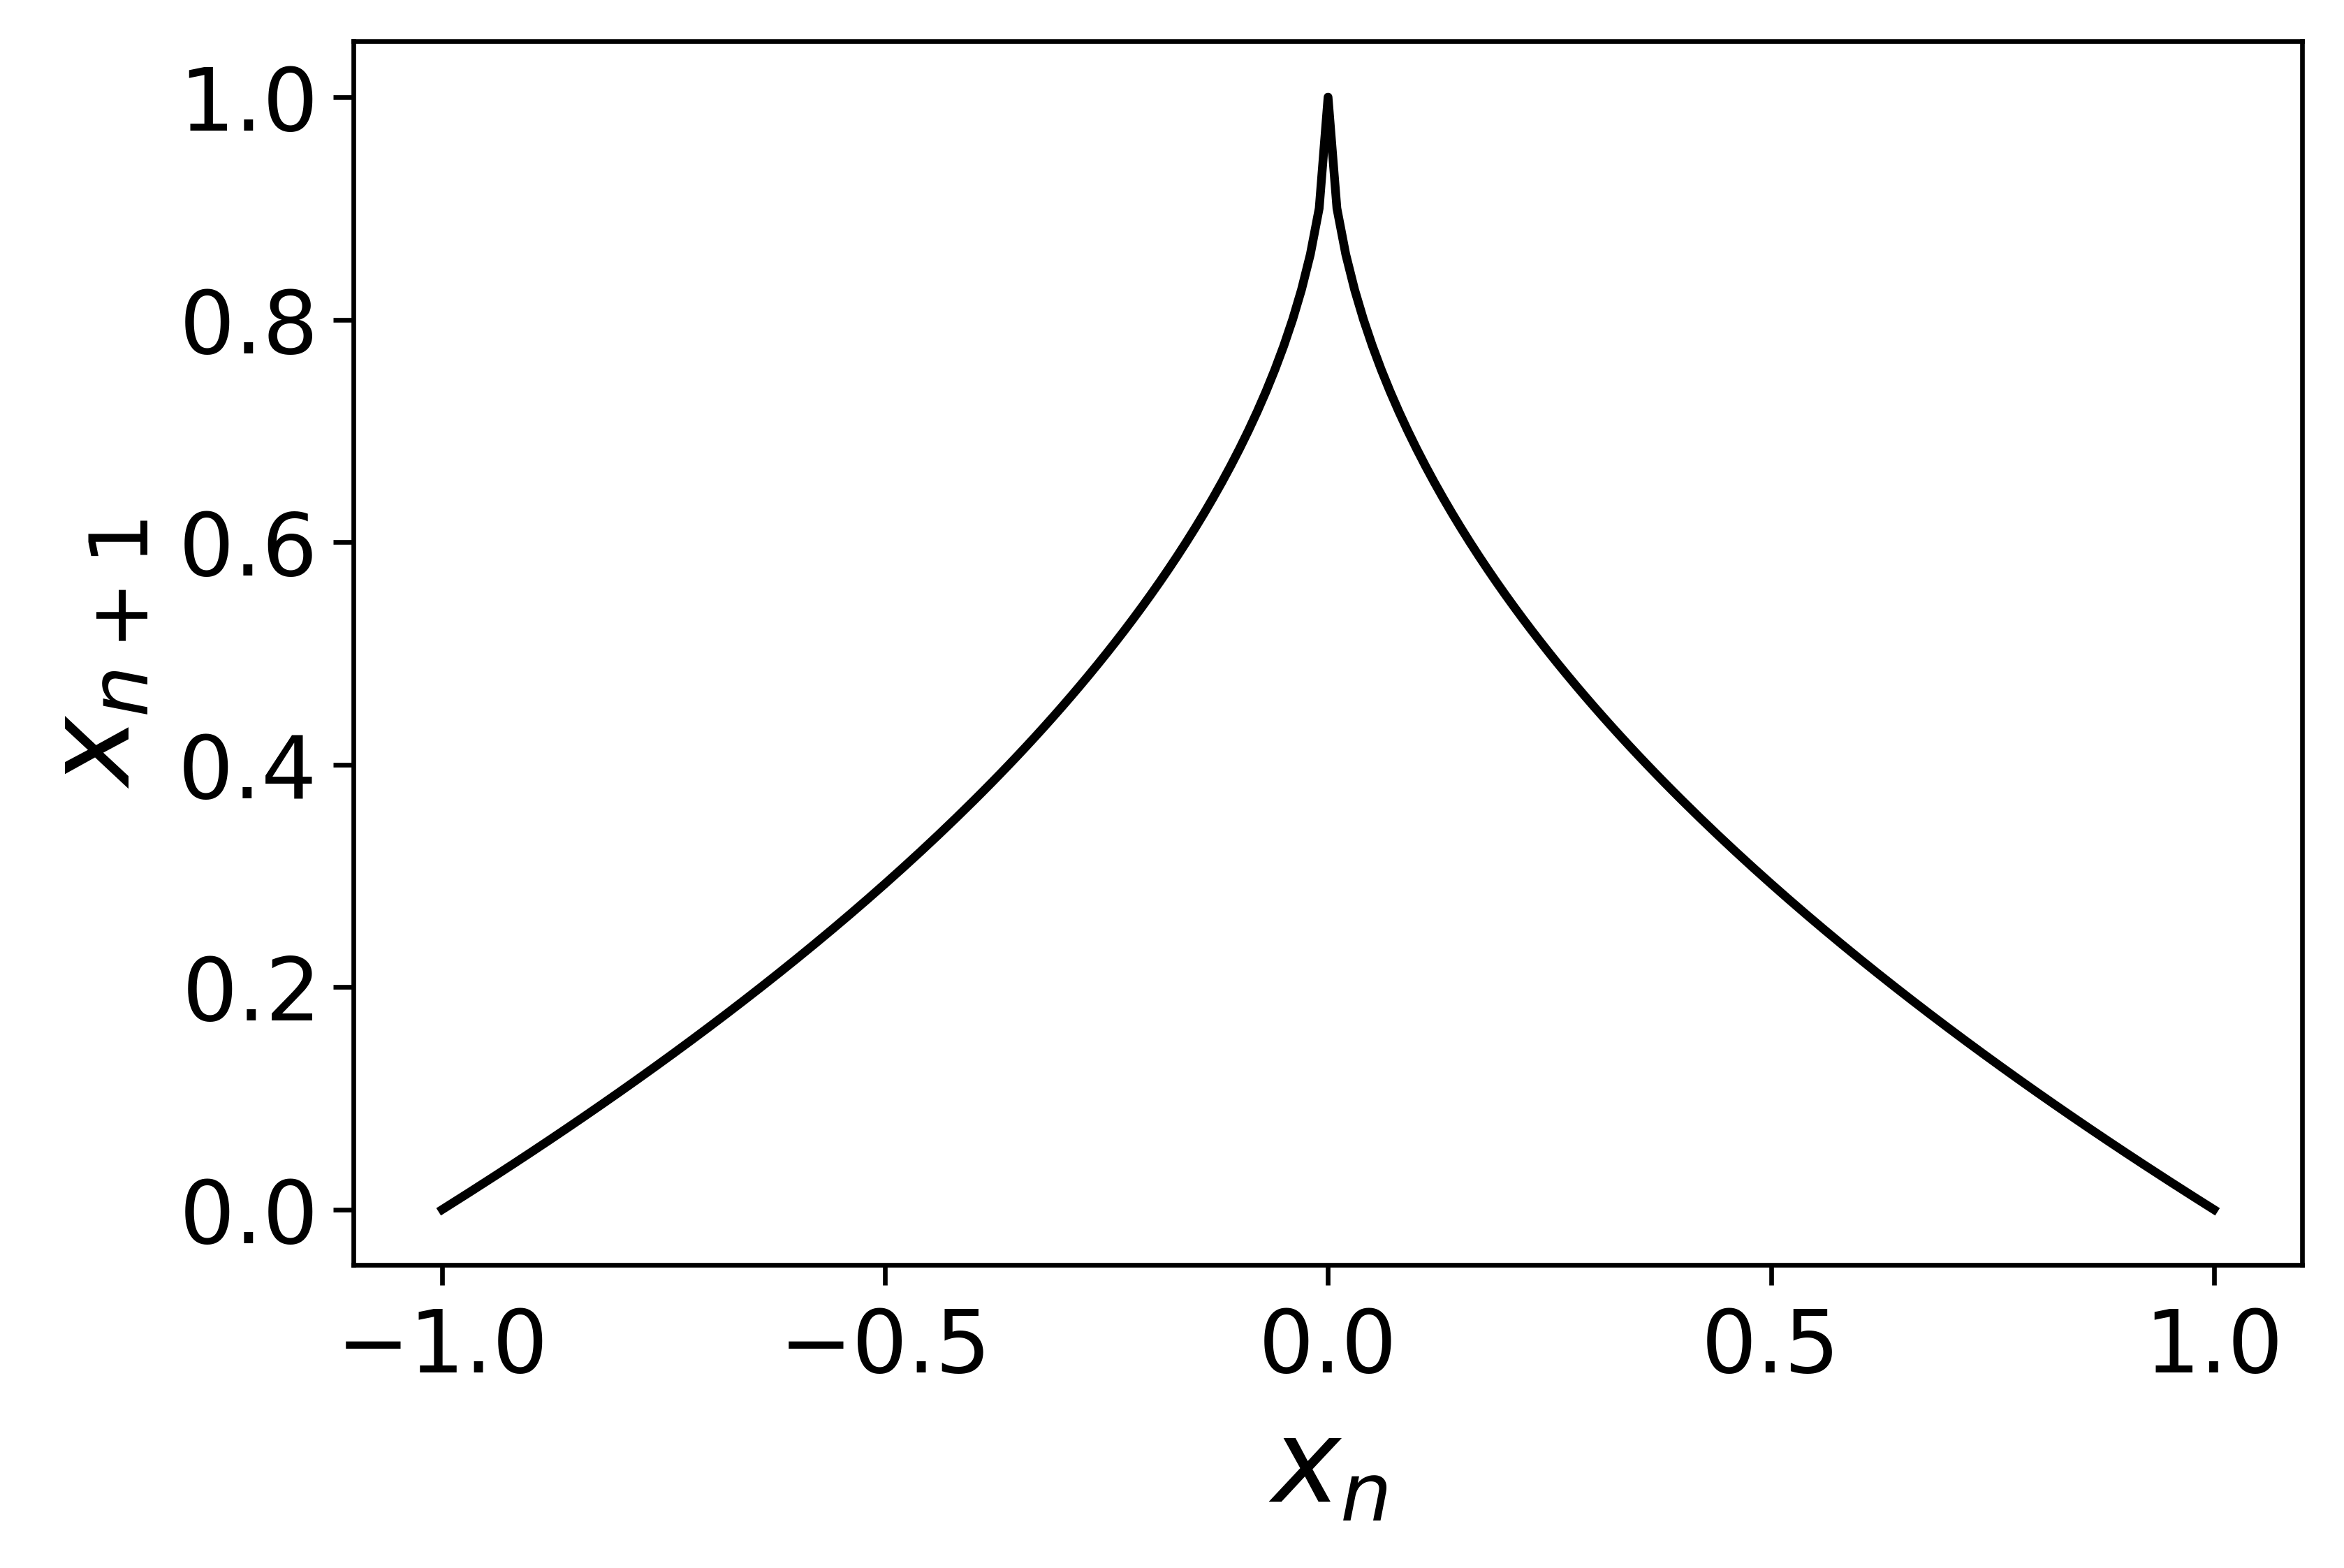

In [149]:
m = 'ren'

# Plotting the ren map iteration function
plt.figure(dpi=dpi)
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.plot(np.linspace(-1, 1, 201),
         np.array([maps(1, x, m) for x in np.linspace(-1, 1, 201)]), c = 'k')
plt.xlabel('$x_{n}$', fontsize=20)
plt.ylabel('$x_{n+1}$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('1b.pdf', bbox_inches = 'tight', pad_inches = 0)

In [150]:
# Determining the bifurcations and Lyapunov exponent
bifurcations = []
Lyapunov_exponent = []
for r in np.linspace(0, 2, 401):
    x = np.random.uniform(0, 1)
    for n in range(900):
        x = maps(r, x, m)
    s = 0
    for n in range(100):
        s += np.log(abs_der(r, x, m)+eps)
        x = maps(r, x, m)
        bifurcations.append([r, x])
    Lyapunov_exponent.append([r, s/100])

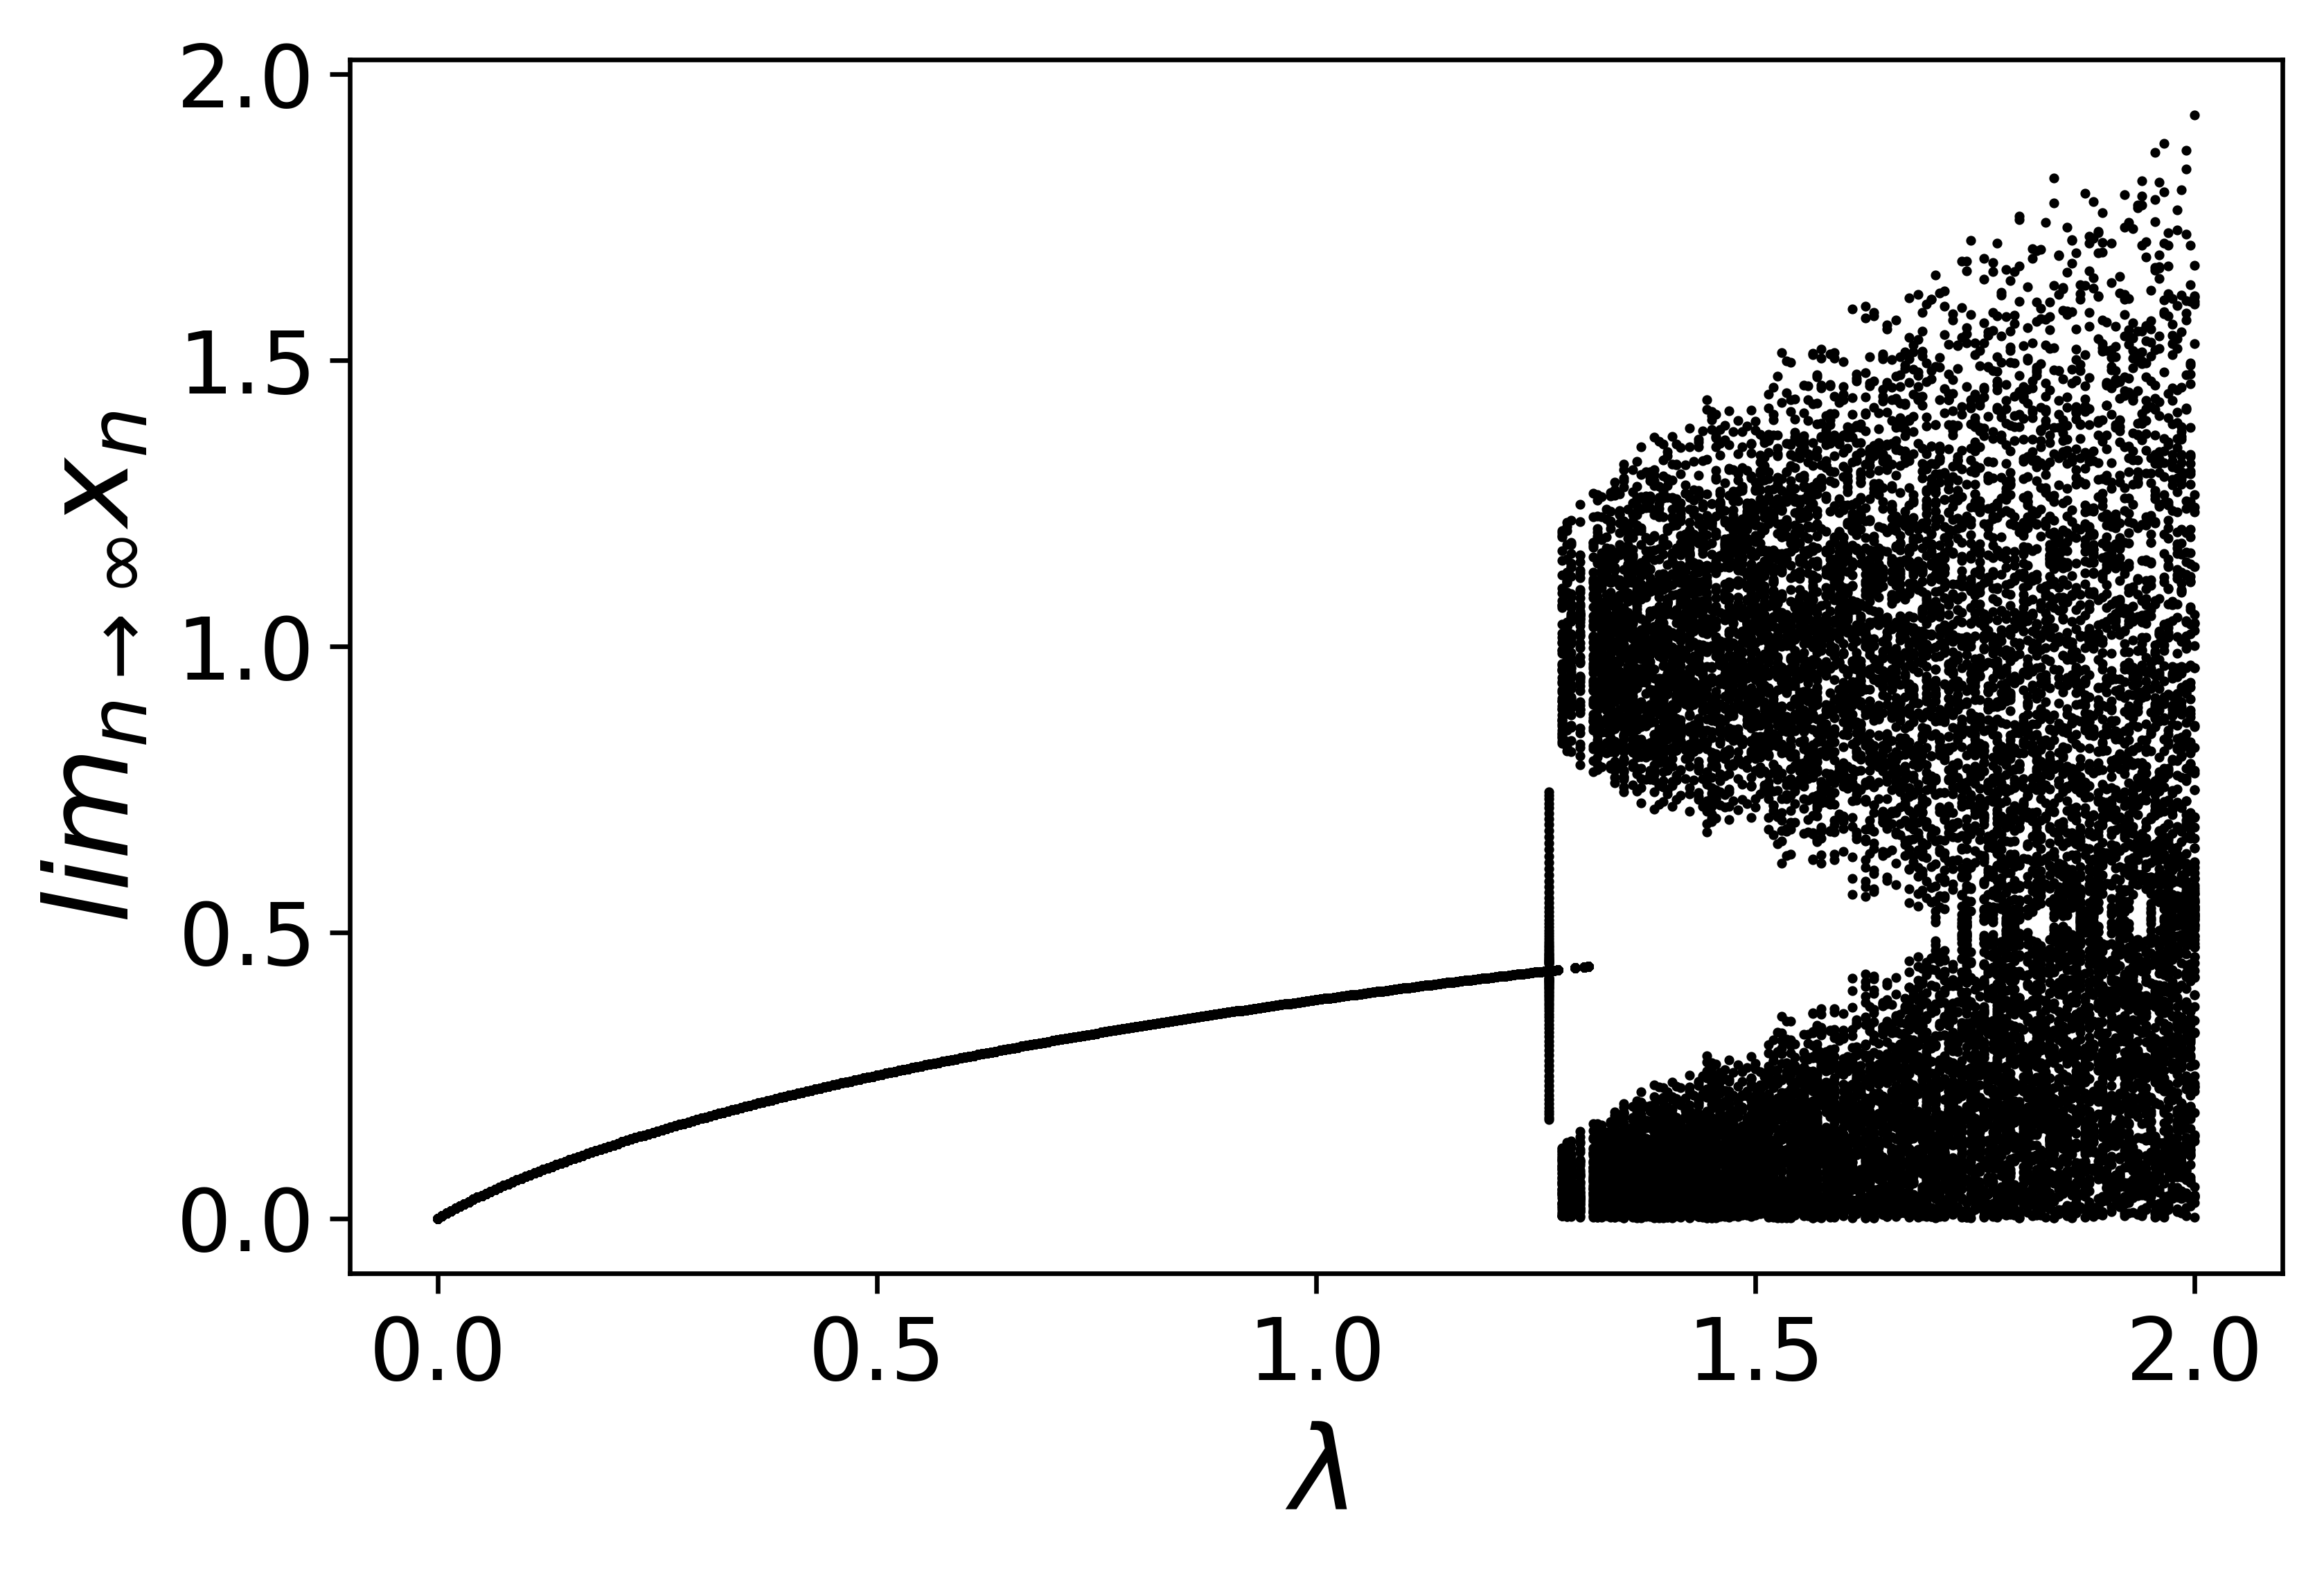

In [151]:
# Plotting the bifurcation diagram for the ren map
plt.figure(dpi=dpi)
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.scatter(*zip(*bifurcations), c = 'k', s = 0.5)
plt.xlabel('$\lambda$', fontsize=20)
plt.ylabel('$lim_{n \\rightarrow \infty} x_{n}$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('1d.pdf', bbox_inches = 'tight', pad_inches = 0)

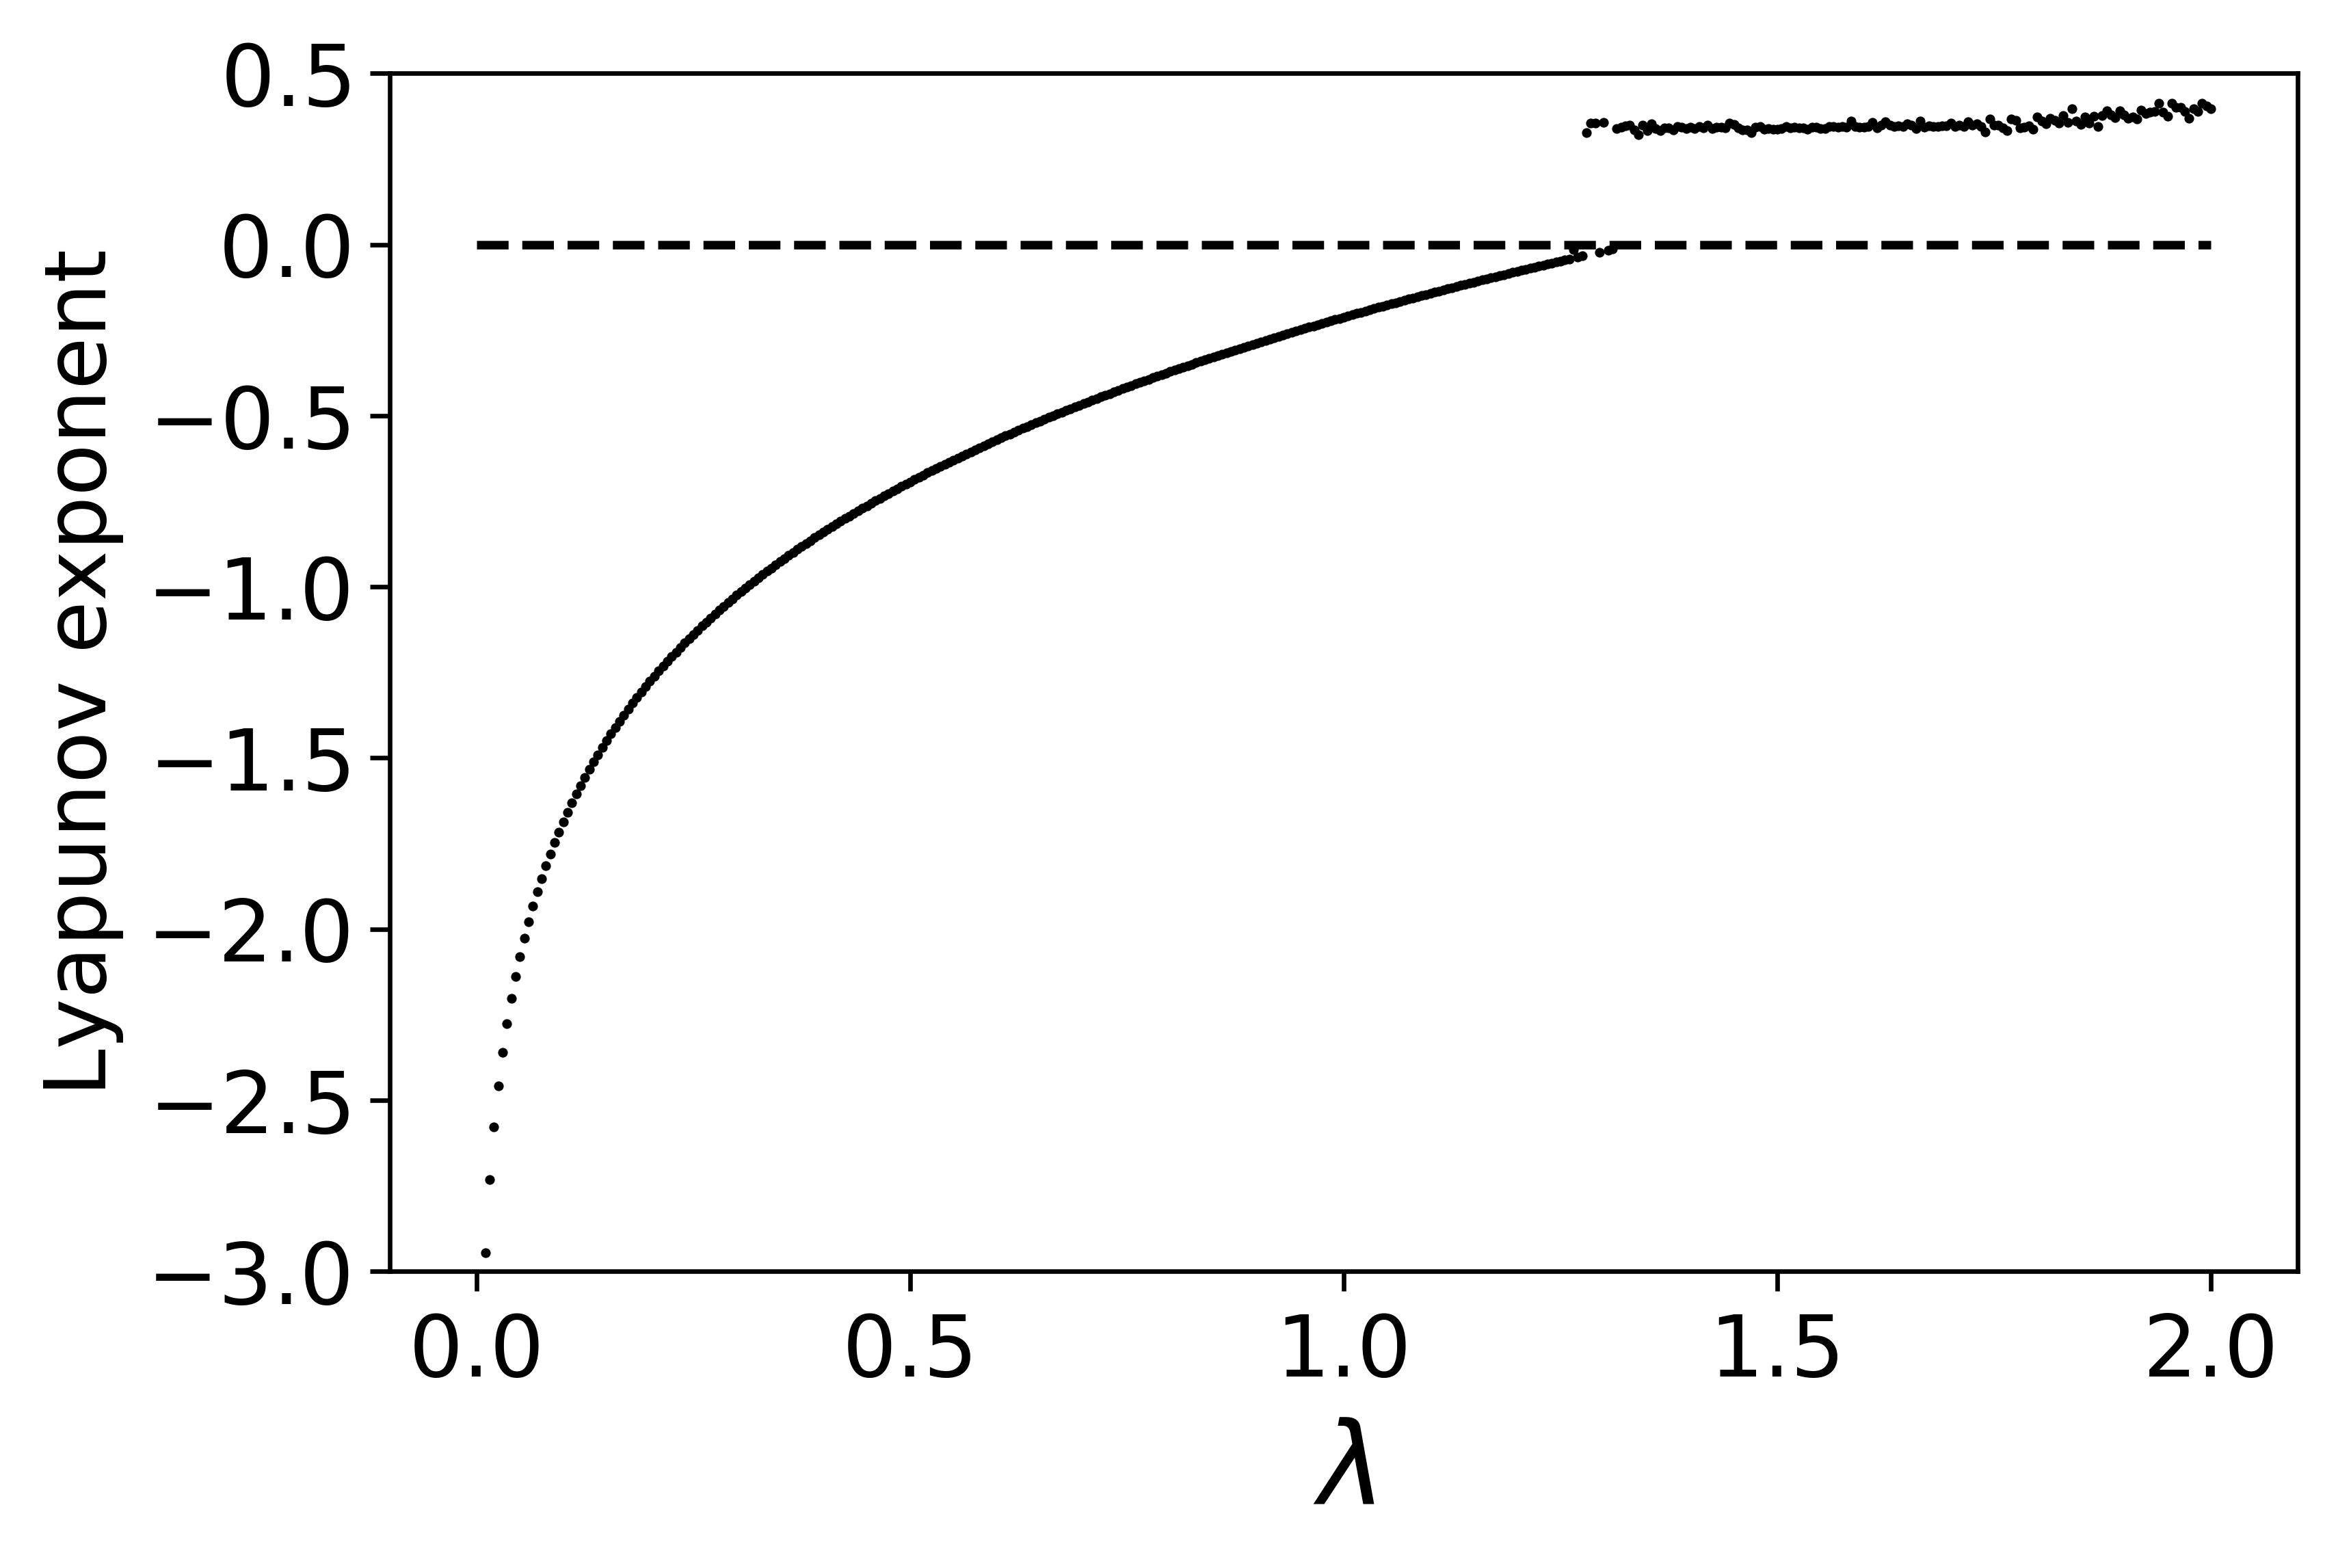

In [152]:
# Plotting the Lyapunov exponent for the ren map
plt.figure(dpi=dpi)
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.scatter(*zip(*Lyapunov_exponent), c = 'k', s = 0.5)
plt.plot(np.linspace(0, 2, 201), np.zeros(201), c = 'k', linestyle = '--')
plt.ylim(-3, 0.5)
plt.xlabel('$\lambda$', fontsize=20)
plt.ylabel('Lyapunov exponent', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('1f.pdf', bbox_inches = 'tight', pad_inches = 0)

In [153]:
# Reading the data on territorial areas
df_Song = pd.read_csv('Song_data.csv', header=0)
df_Taagepera = pd.read_csv('Taagepera_data.csv',header=0)

In [154]:
# The general form posited for lambda(t)
def lambda_ansatz(params, t):
    return params[0] + params[1]*np.exp(-t*params[2])*np.sin(params[3]*(t - params[4]))

# Estimated paratemer values
c = 1.29
T = 725
gamma = 1/1250
w = 2*np.pi/T
t0 = 145

params_Song = [c, 1, gamma, w, t0]
params_Taagepera = [c, 1, 0, w, t0]
time = np.linspace(-475, 1911, 1911+475+1)
fit_Song = lambda_ansatz(params_Song, time)
fit_Taagepera = lambda_ansatz(params_Taagepera, time)
scale = 3500 # given by 1470/(0.945*sol(-1, 4/3)) such that param(1470/scale)/(4/3) = 90%

# Converting to float years and areas
start_Song = np.array(pd.to_numeric(df_Song['Start'], errors='coerce'))
end_Song = np.array(pd.to_numeric(df_Song['End'], errors='coerce'))
years_Song = np.array(pd.to_numeric(df_Song['Max'], errors='coerce'))
scaled_areas_Song =  np.array(pd.to_numeric(df_Song['Area'], errors='coerce'))/scale
years_Taagepera = np.array(pd.to_numeric(df_Taagepera['Year'], errors='coerce'))
scaled_areas_Taagepera =  np.array(pd.to_numeric(df_Taagepera['Area'], errors='coerce'))/scale

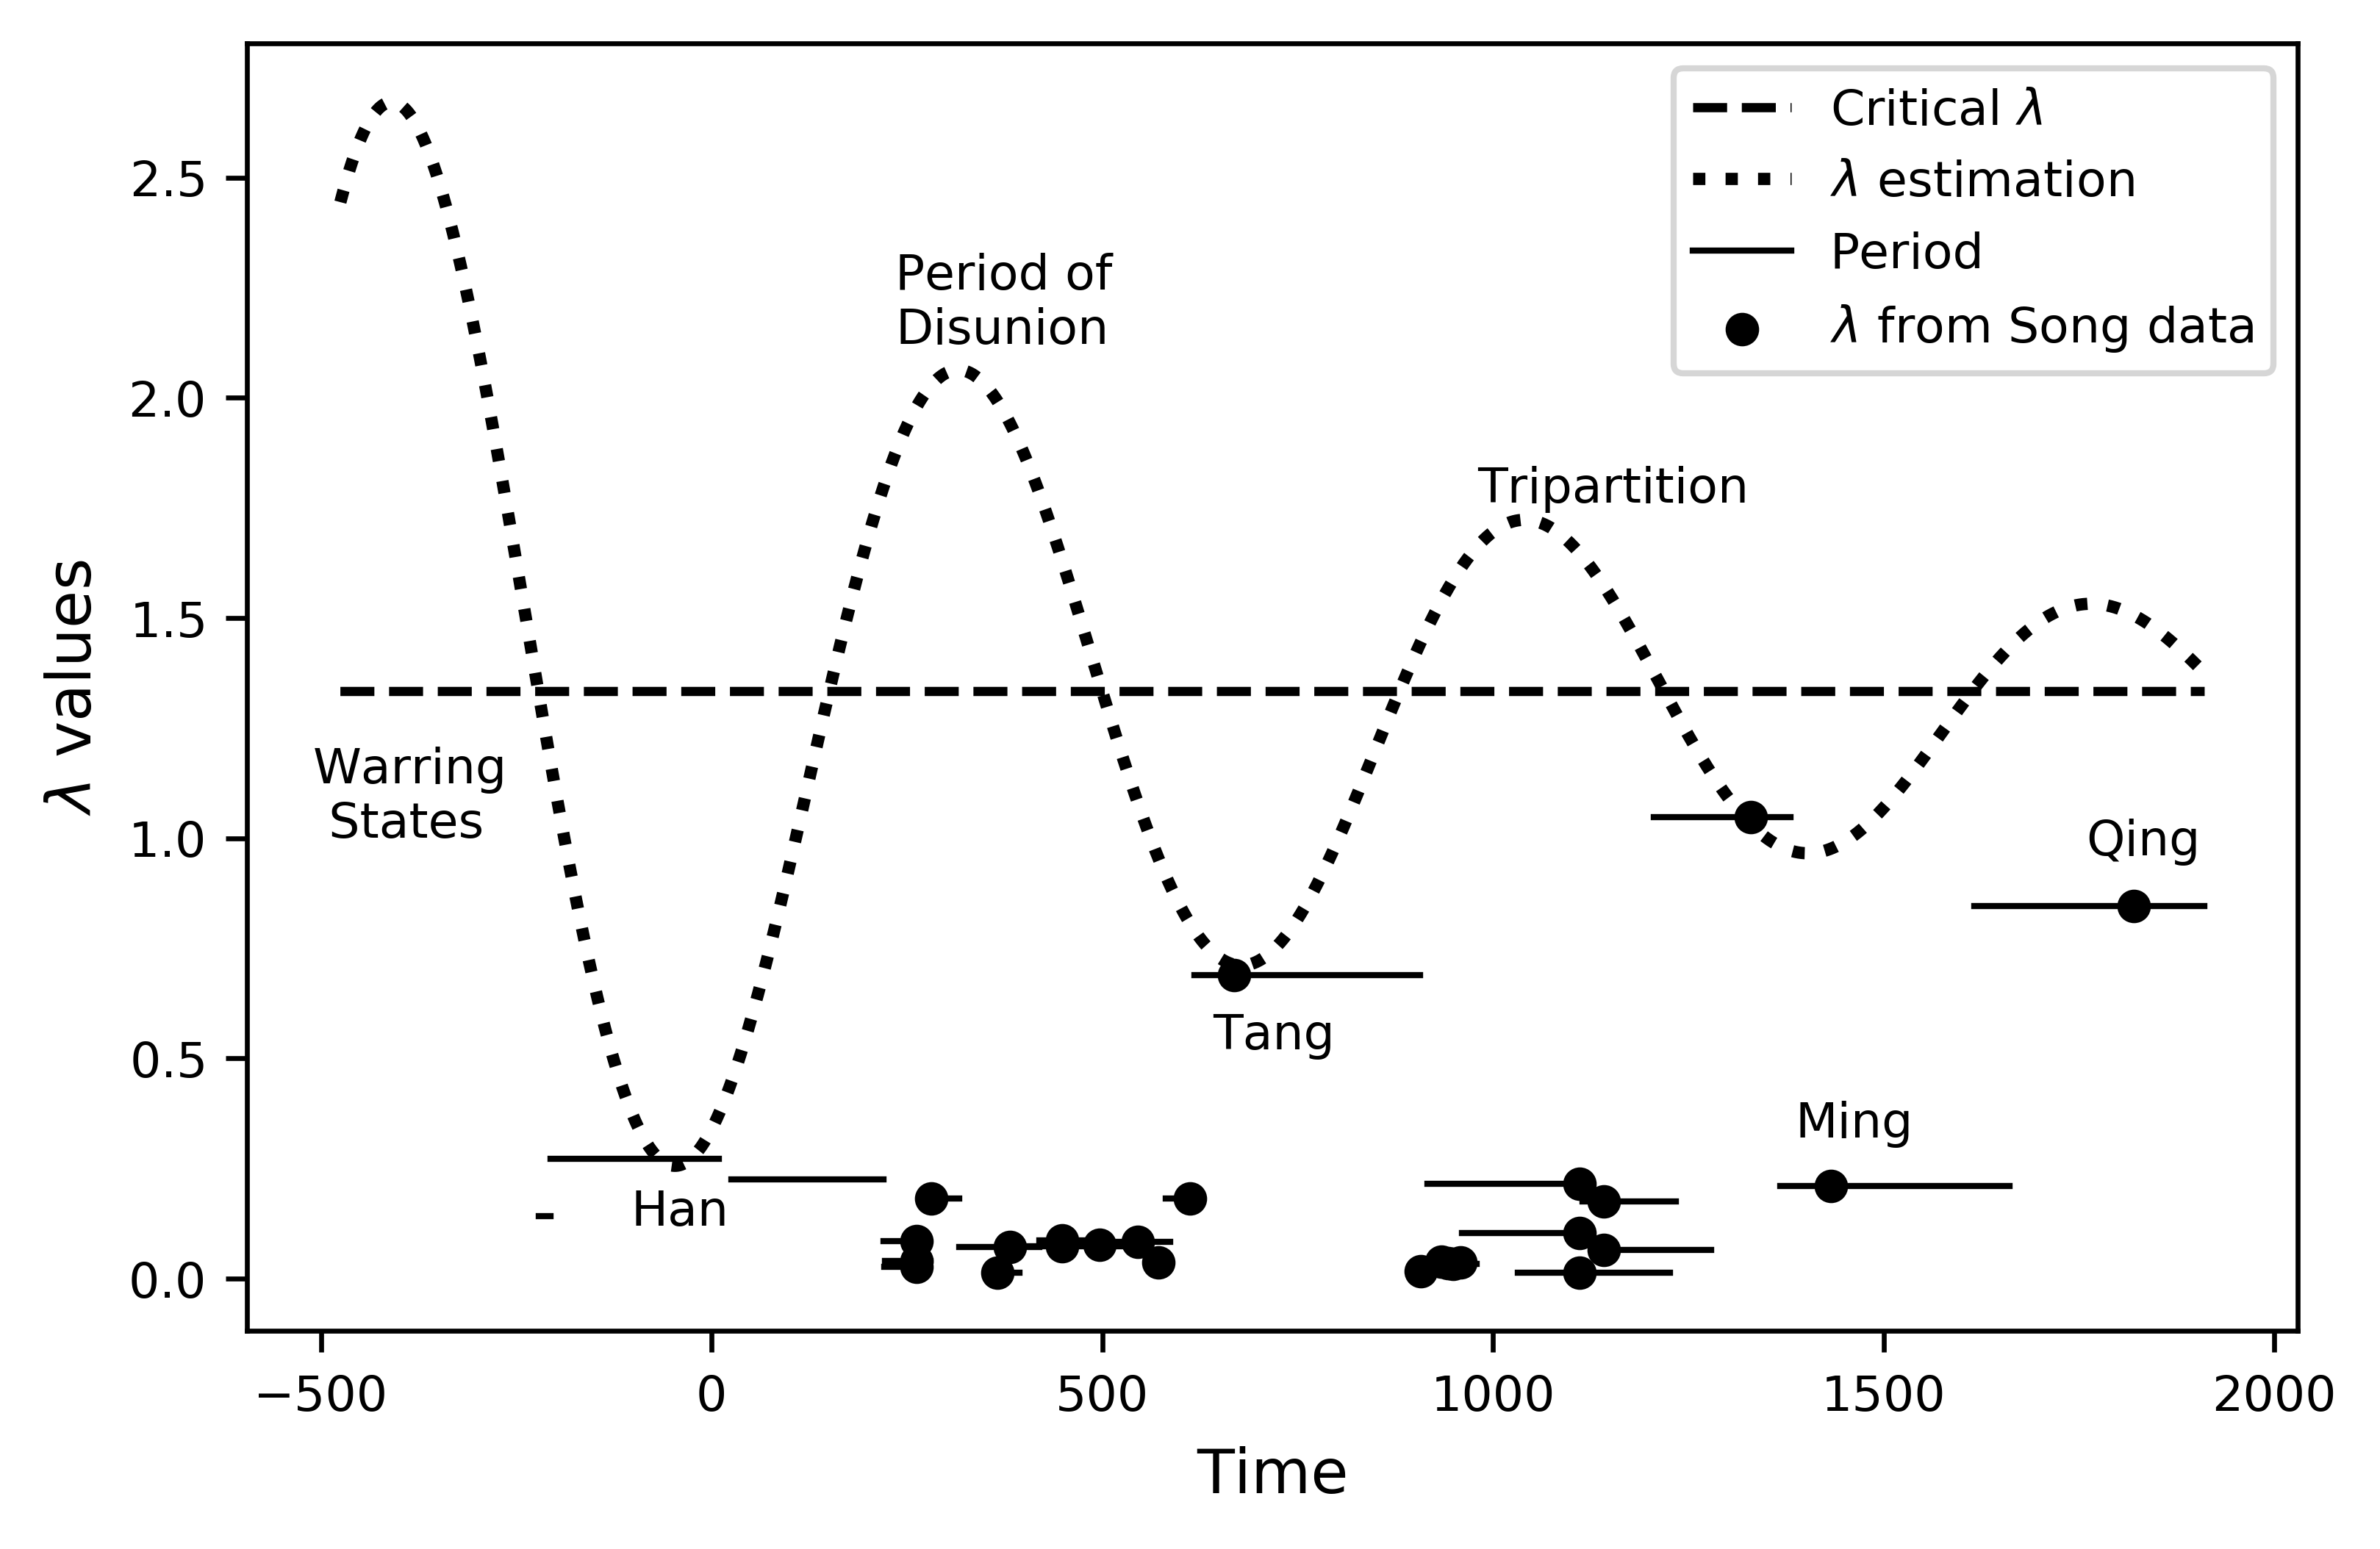

In [155]:
# Plotting lambda(t) fit for Song data
plt.figure(dpi=dpi)
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.plot(time, np.ones(len(time))*4/3, c = 'k', linestyle = '--', label = 'Critical $\lambda$')
plt.scatter(years_Song, lambda_from_scaled_area(scaled_areas_Song),
            c = 'k', s=20, label = '$\lambda$ from Song data')
plt.plot(time, fit_Song, c = 'k', linestyle = ':', linewidth=2, label = '$\lambda$ estimation')
for i in range(len(scaled_areas_Song)):
    x = range(int(start_Song[i]), int(end_Song[i])+1)
    y = lambda_from_scaled_area(np.array([scaled_areas_Song[i] for _ in x]))
    if i == 0:
        plt.plot(x, y, c = 'k', linewidth=1, label = 'Period')
    else:
        plt.plot(x, y, c = 'k', linewidth=1)
plt.xlabel('Time', fontsize=10)
plt.ylabel('$\lambda$ values', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.legend(loc = 'upper right', prop={'size': 8})

plt.figtext(0.15, 0.43, 'Warring\n States', fontsize=8)
plt.figtext(0.27, 0.21, 'Han', fontsize=8)
plt.figtext(0.37, 0.71, 'Period of\nDisunion', fontsize=8)
plt.figtext(0.49, 0.31, 'Tang', fontsize=8)
plt.figtext(0.59, 0.62, 'Tripartition', fontsize=8)
plt.figtext(0.71, 0.26, 'Ming', fontsize=8)
plt.figtext(0.82, 0.42, 'Qing', fontsize=8)

plt.savefig('2a.pdf', bbox_inches = 'tight', pad_inches = 0)

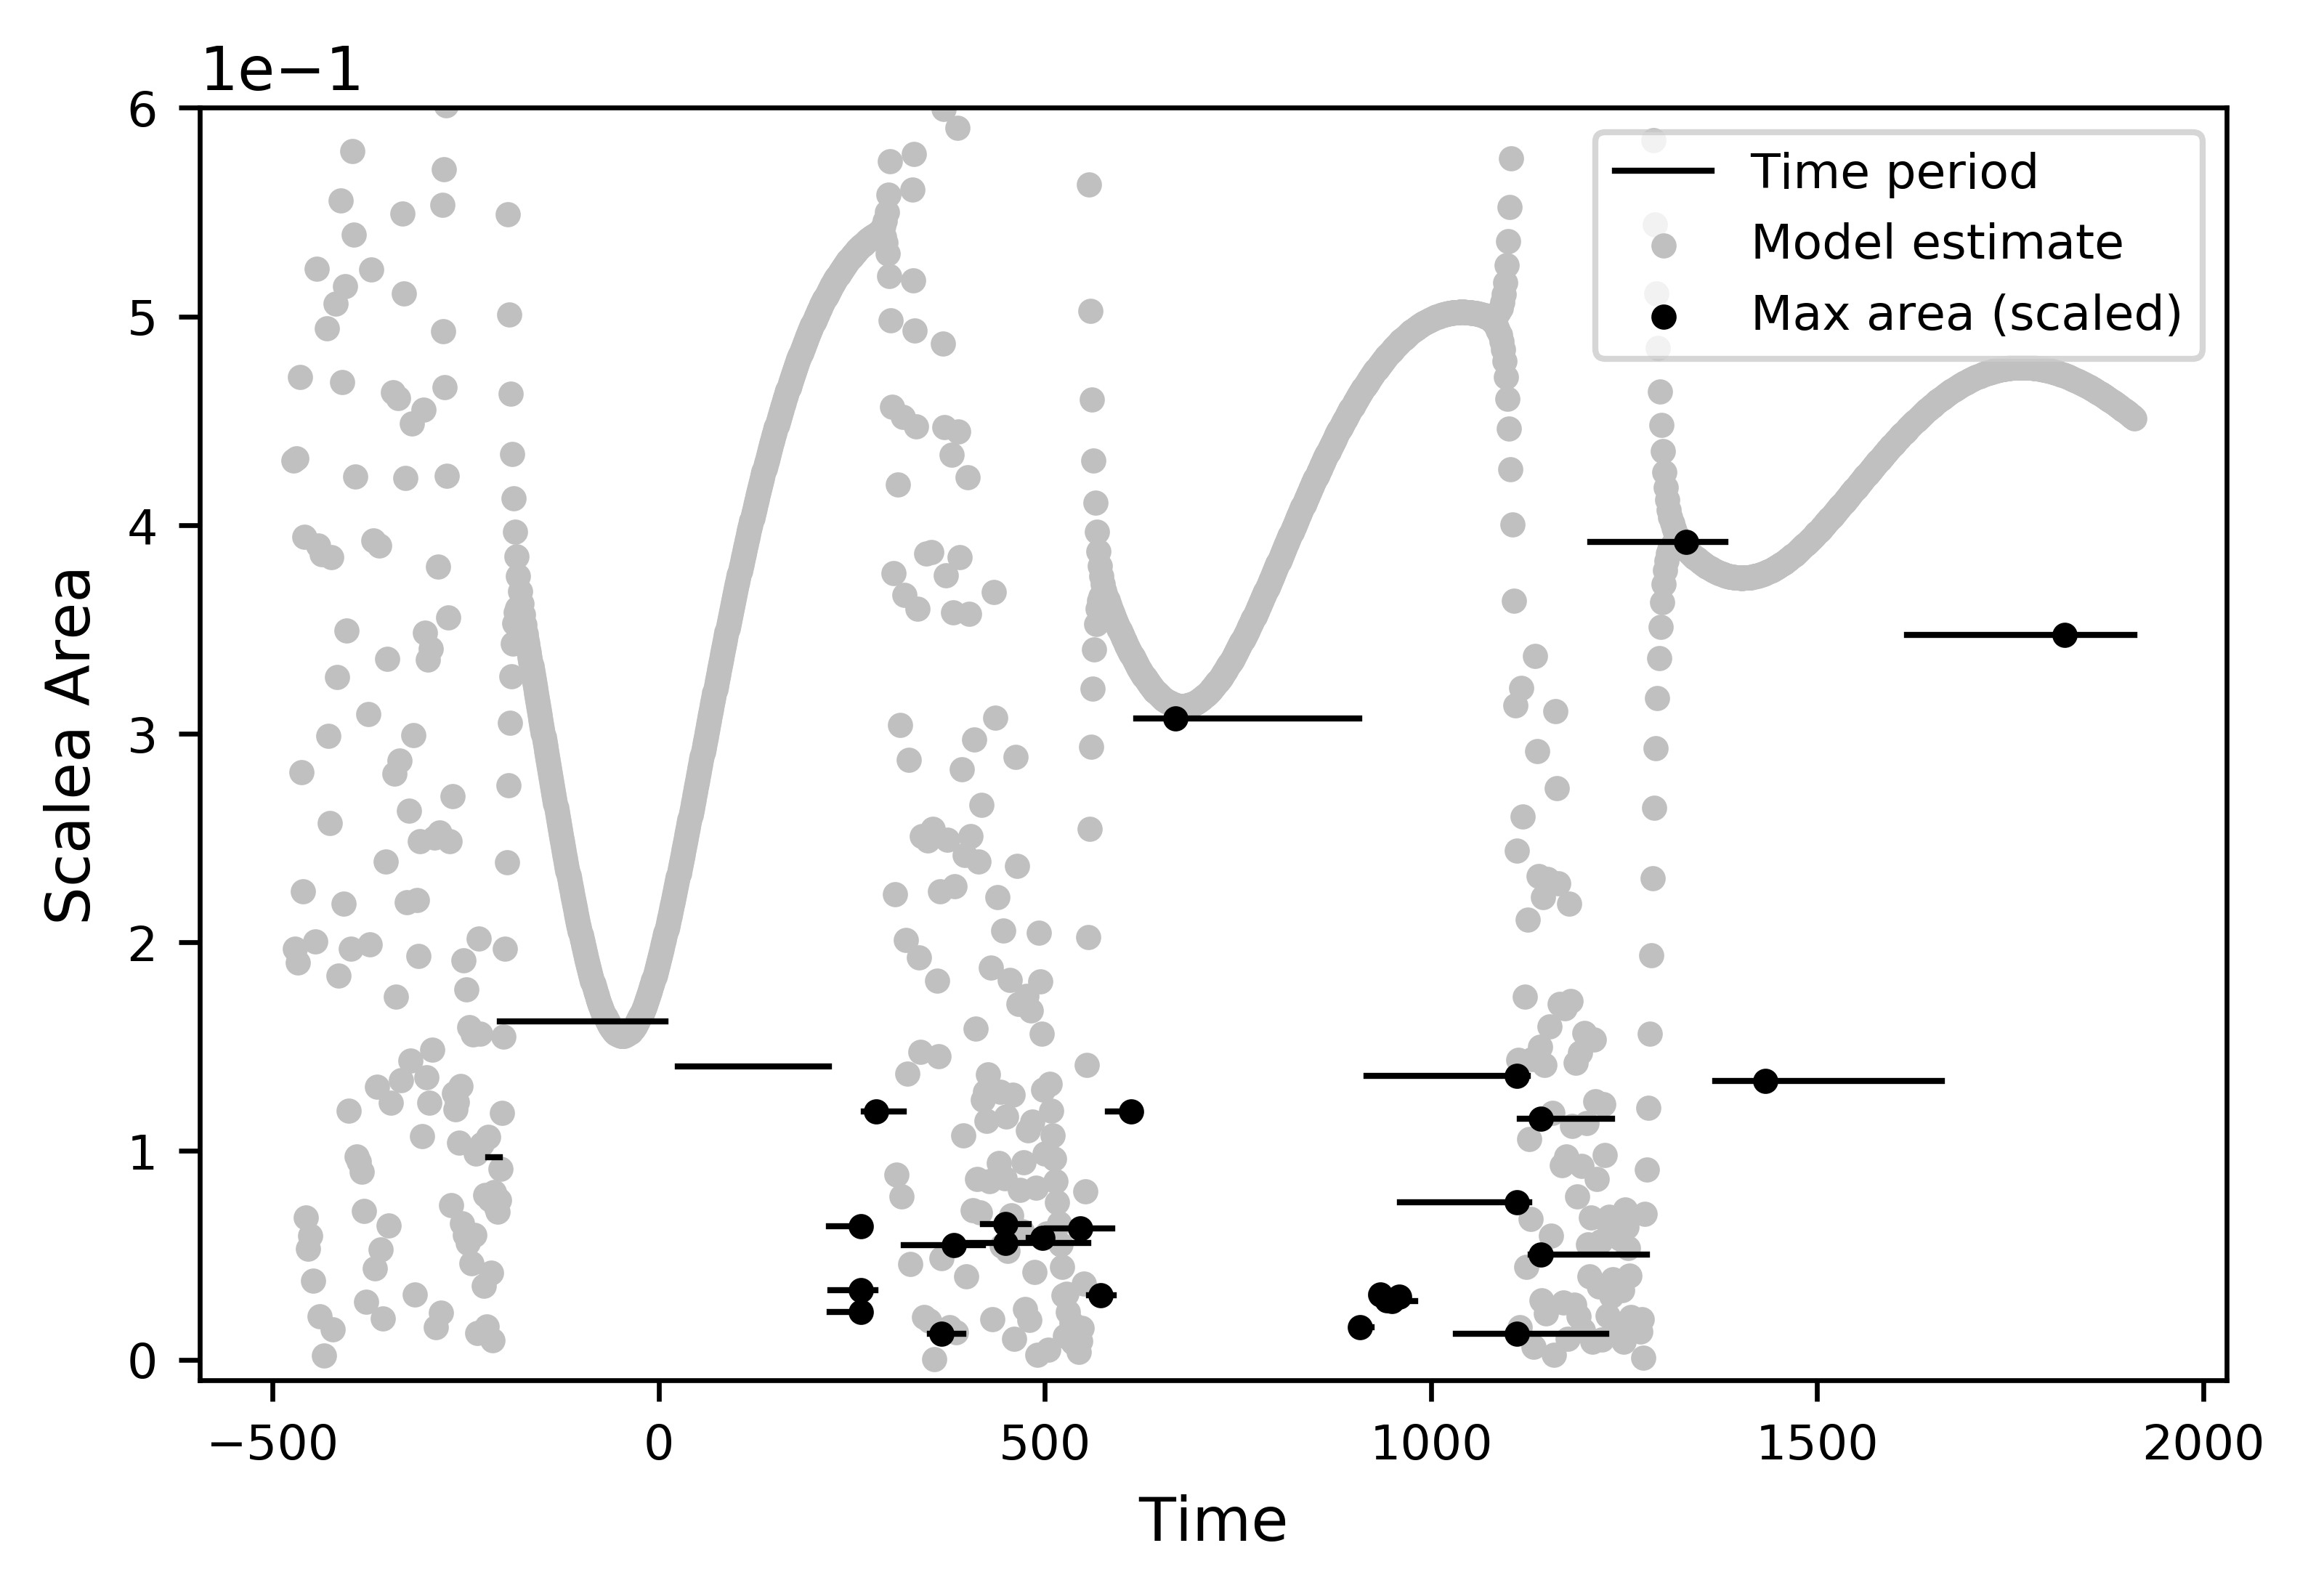

In [156]:
# Determining ren map values for evolution of lambda(t) with Song data
x = 0
discrete_time = np.array(range(-475, 1912))
trajectory_Song = []
for t in discrete_time:
    r = lambda_ansatz(params_Song, t)
    x = maps(r, x, m)
    trajectory_Song.append(x)

# Plotting the map values
plt.figure(dpi=dpi)
plt.ylim(-0.01, 0.6)
plt.scatter(discrete_time, trajectory_Song, c='silver',  s=10, label='Model estimate')
plt.scatter(years_Song, scaled_areas_Song, c='k', s=10, label='Max area (scaled)')
for i in range(len(scaled_areas_Song)):
    x = range(int(start_Song[i]), int(end_Song[i])+1)
    y = np.array([scaled_areas_Song[i] for _ in x])
    if i == 0:
        plt.plot(x, y, c = 'k', linewidth=1, label = 'Time period')
    else:
        plt.plot(x, y, c = 'k', linewidth=1)    
plt.xlabel('Time', fontsize=10)
plt.ylabel('Scalea Area', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.legend(loc = 'upper right', prop={'size': 8})

plt.savefig('2c.pdf', bbox_inches = 'tight', pad_inches = 0)

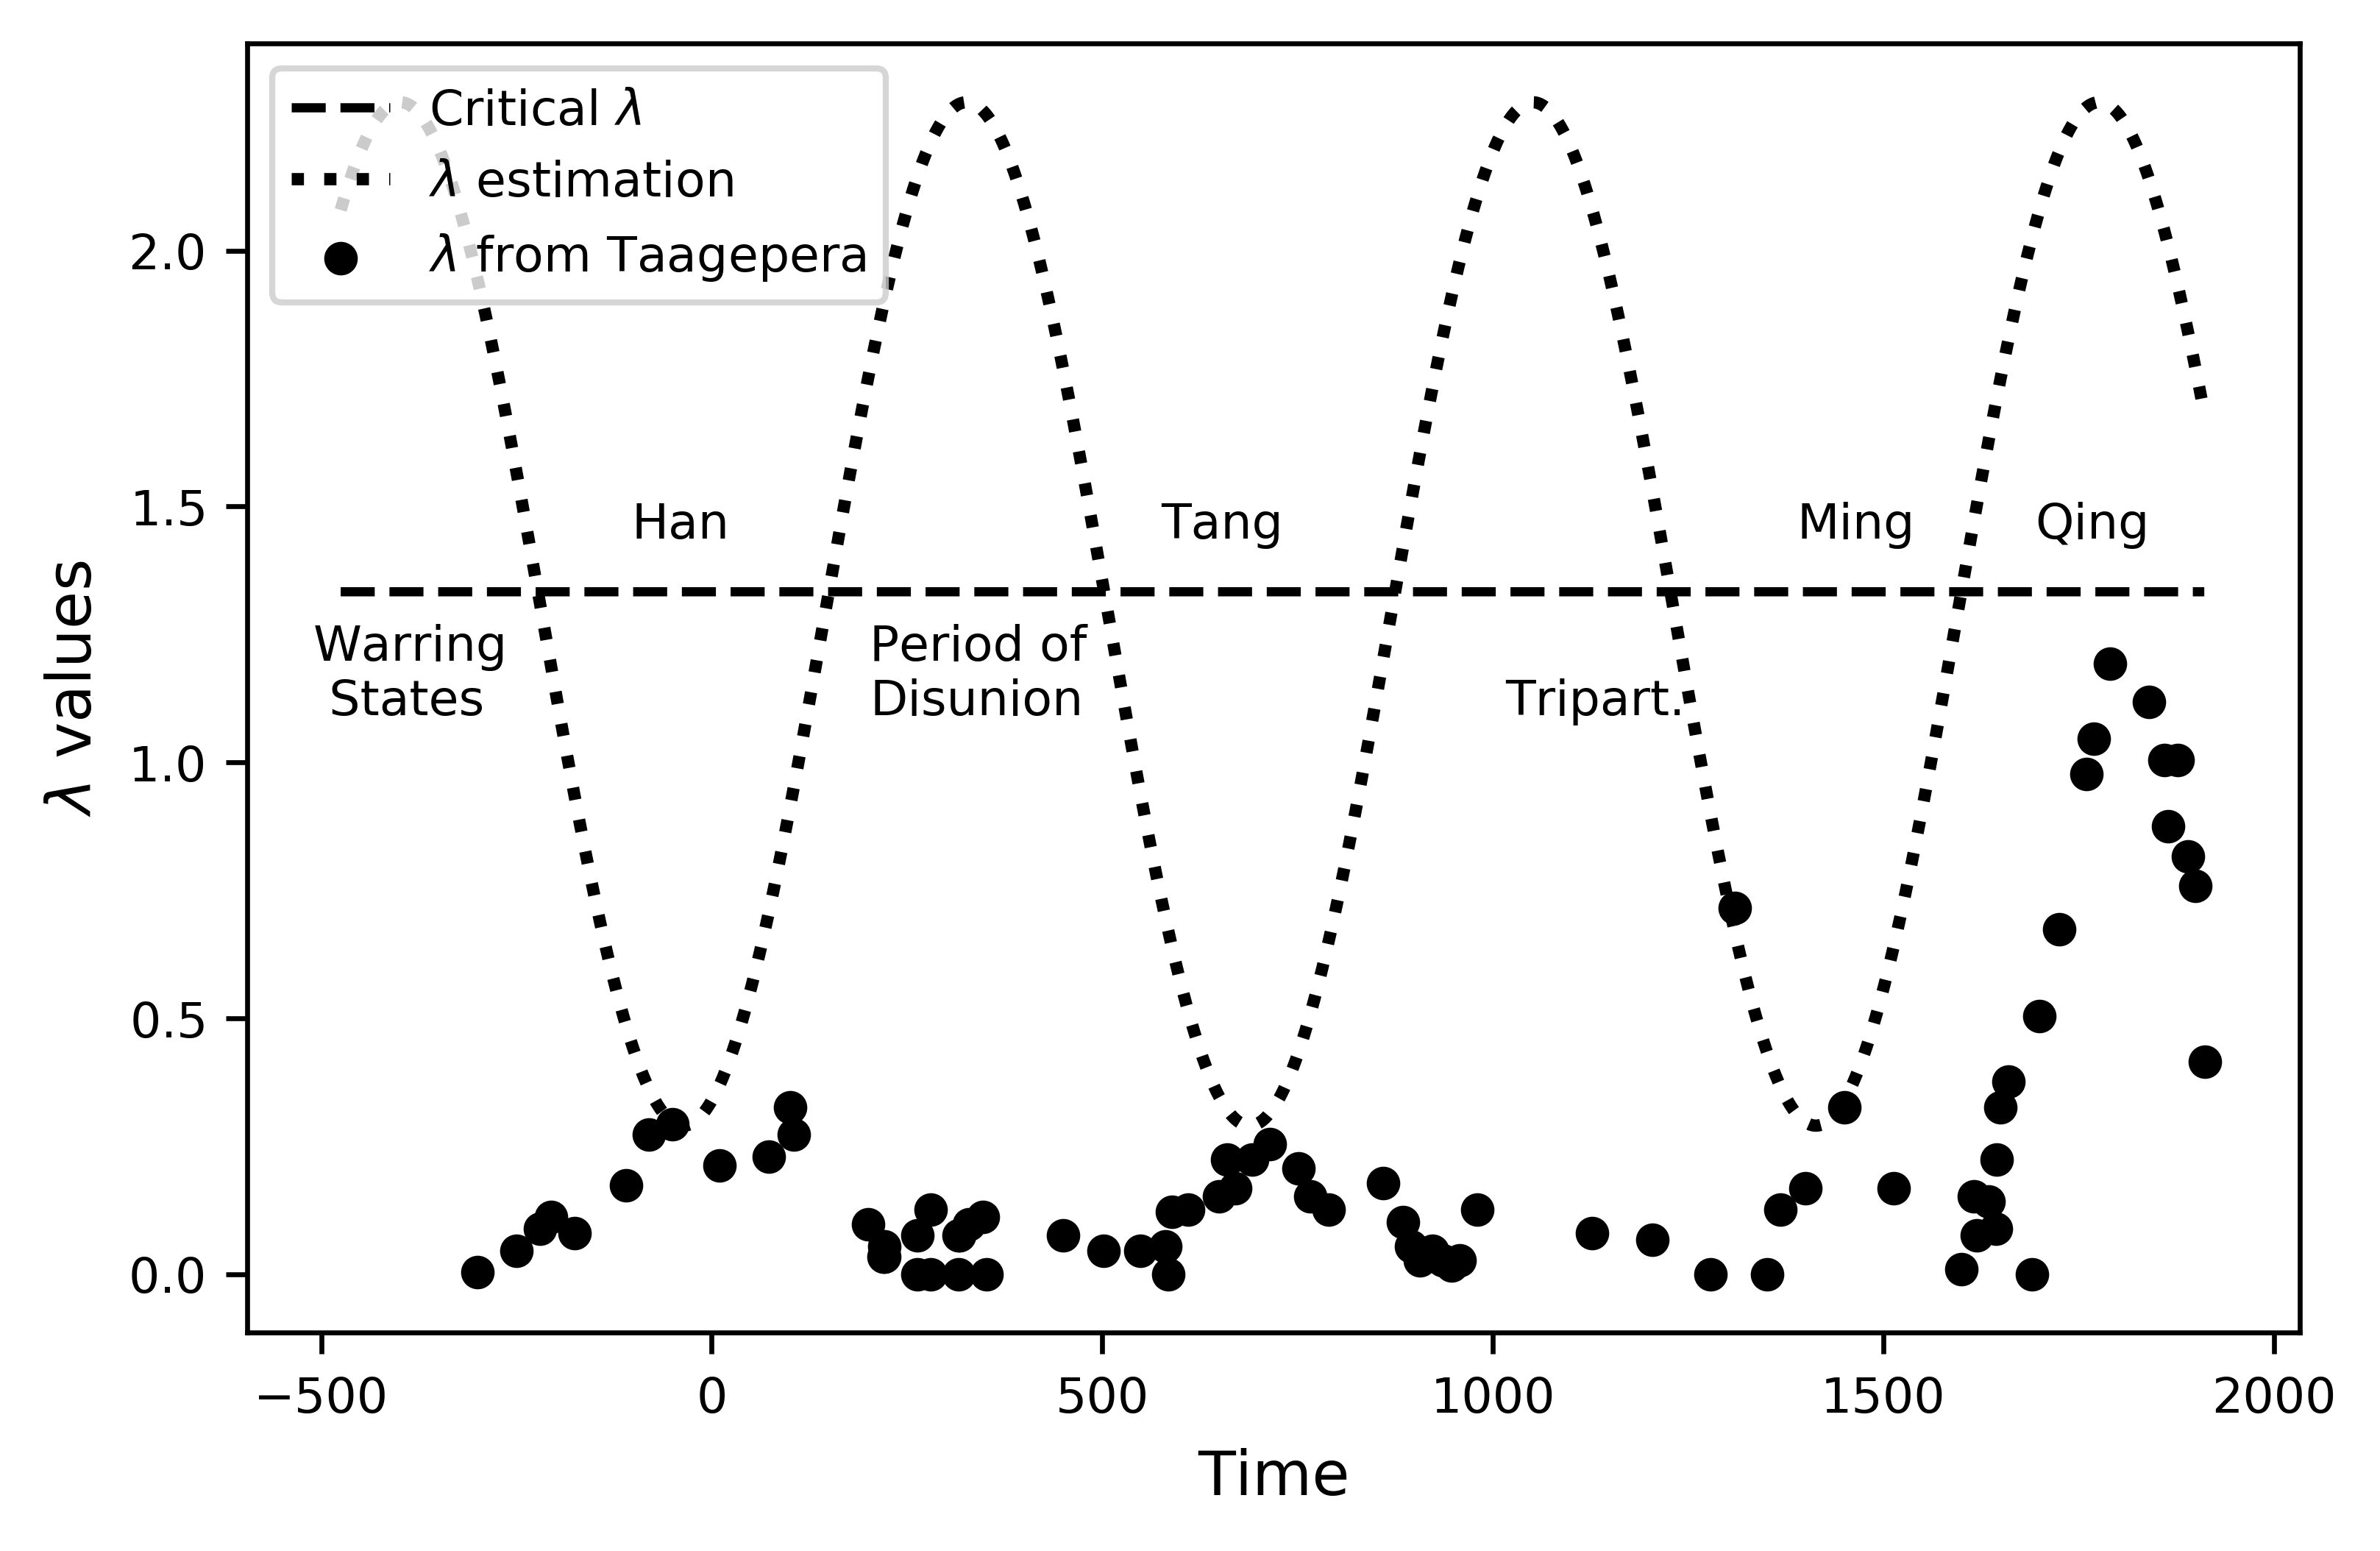

In [157]:
# Plotting lambda(t) fit for Taagepera data
plt.figure(dpi=dpi)
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.plot(time, np.ones(len(time))*4/3, c = 'k', linestyle = '--', label = 'Critical $\lambda$')
plt.scatter(years_Taagepera, lambda_from_scaled_area(scaled_areas_Taagepera),
            c = 'k', s=20, label = '$\lambda$ from Taagepera')
plt.plot(time, fit_Taagepera, c = 'k', linestyle = ':', linewidth=2, label = '$\lambda$ estimation')
plt.xlabel('Time', fontsize=10)
plt.ylabel('$\lambda$ values', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.legend(loc = 'upper left', prop={'size': 8})

plt.figtext(0.15, 0.5, 'Warring\n States', fontsize=8)
plt.figtext(0.27, 0.6, 'Han', fontsize=8)
plt.figtext(0.36, 0.5, 'Period of\nDisunion', fontsize=8)
plt.figtext(0.47, 0.6, 'Tang', fontsize=8)
plt.figtext(0.60, 0.5, 'Tripart.', fontsize=8)
plt.figtext(0.71, 0.6, 'Ming', fontsize=8)
plt.figtext(0.80, 0.6, 'Qing', fontsize=8)#

plt.savefig('2b.pdf', bbox_inches = 'tight', pad_inches = 0)

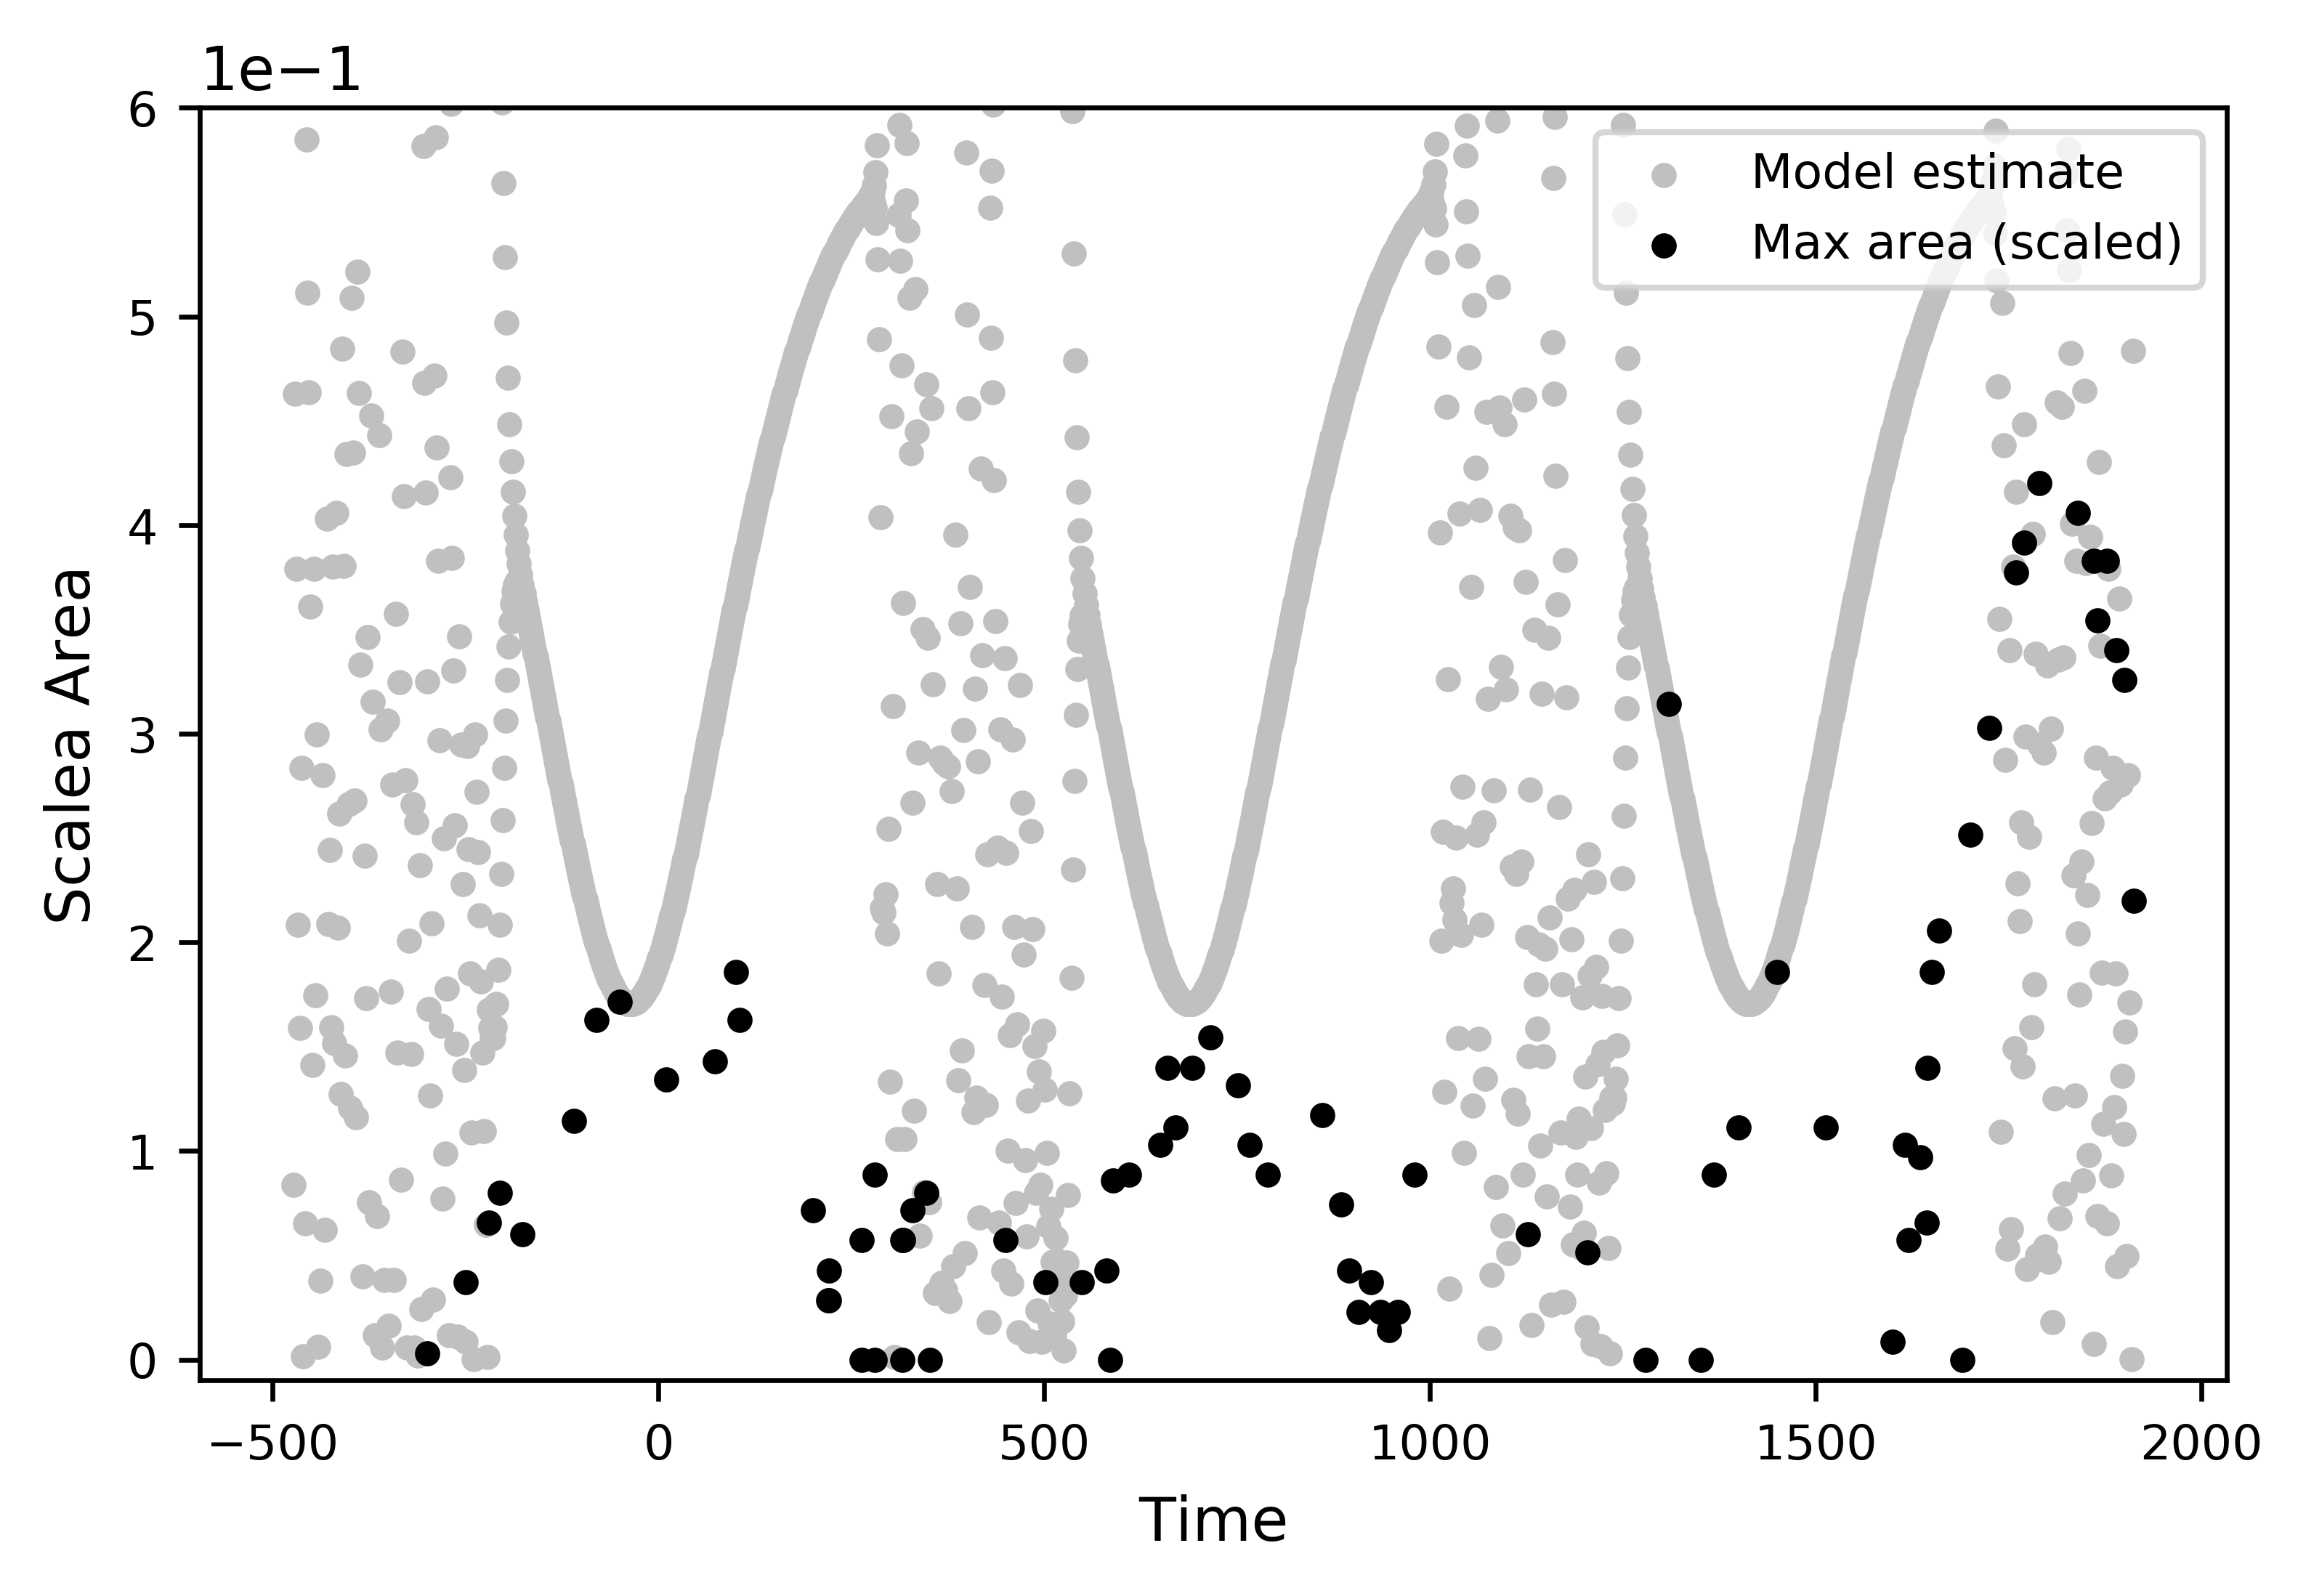

In [158]:
# Determining ren map values for evolution of lambda(t) with Taagepera data
x = 0
discrete_time = np.array(range(-475, 1912))
trajectory_Taagepera = []
for t in discrete_time:
    r = lambda_ansatz(params_Taagepera, t)
    x = maps(r, x, m)
    trajectory_Taagepera.append(x)

# Plotting the map values
plt.figure(dpi=dpi)
plt.ylim(-0.01, 0.6)
plt.scatter(discrete_time, trajectory_Taagepera, c='silver',  s=10, label='Model estimate')
plt.scatter(years_Taagepera, scaled_areas_Taagepera, c='k', s=10, label='Max area (scaled)')
plt.xlabel('Time', fontsize=10)
plt.ylabel('Scalea Area', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.legend(loc = 'upper right', prop={'size': 8})

plt.savefig('2d.pdf', bbox_inches = 'tight', pad_inches = 0)

In [159]:
# Reading the data on population
read_data = pd.read_csv('Population_data.csv', names=["Year", "Population"])
df_Population = read_data.sort_values('Year')

# The years in the population data
t_0 = df_Population['Year'][0]  # -217
t_1 = df_Population['Year'][80] # 1895
time_Population = np.linspace(t_0, t_1, int(t_1-t_0))
period = t_1-t_0

In [160]:
# Fourier coefficients
def cn(y, n, time, period):
    c = y*np.exp(-1j*2*n*np.pi*time/period)
    return c.sum()/c.size

# Fourier series
def f(y, x, Nh, time, period):
    f = np.array([2*cn(y, i, time, period)*np.exp(1j*2*i*np.pi*x/period) for i in range(1,Nh+1)])
    return f.sum()

# Computing the 3rd order Fourier series
a0 = 3
n = 3
x = np.interp(time_Population, df_Population['Year'],  df_Population['Population'])
xf = np.array([f(x, t, n, time_Population, period).real for t in time_Population])
P = 50 # Scaling factor for the population (in millions)

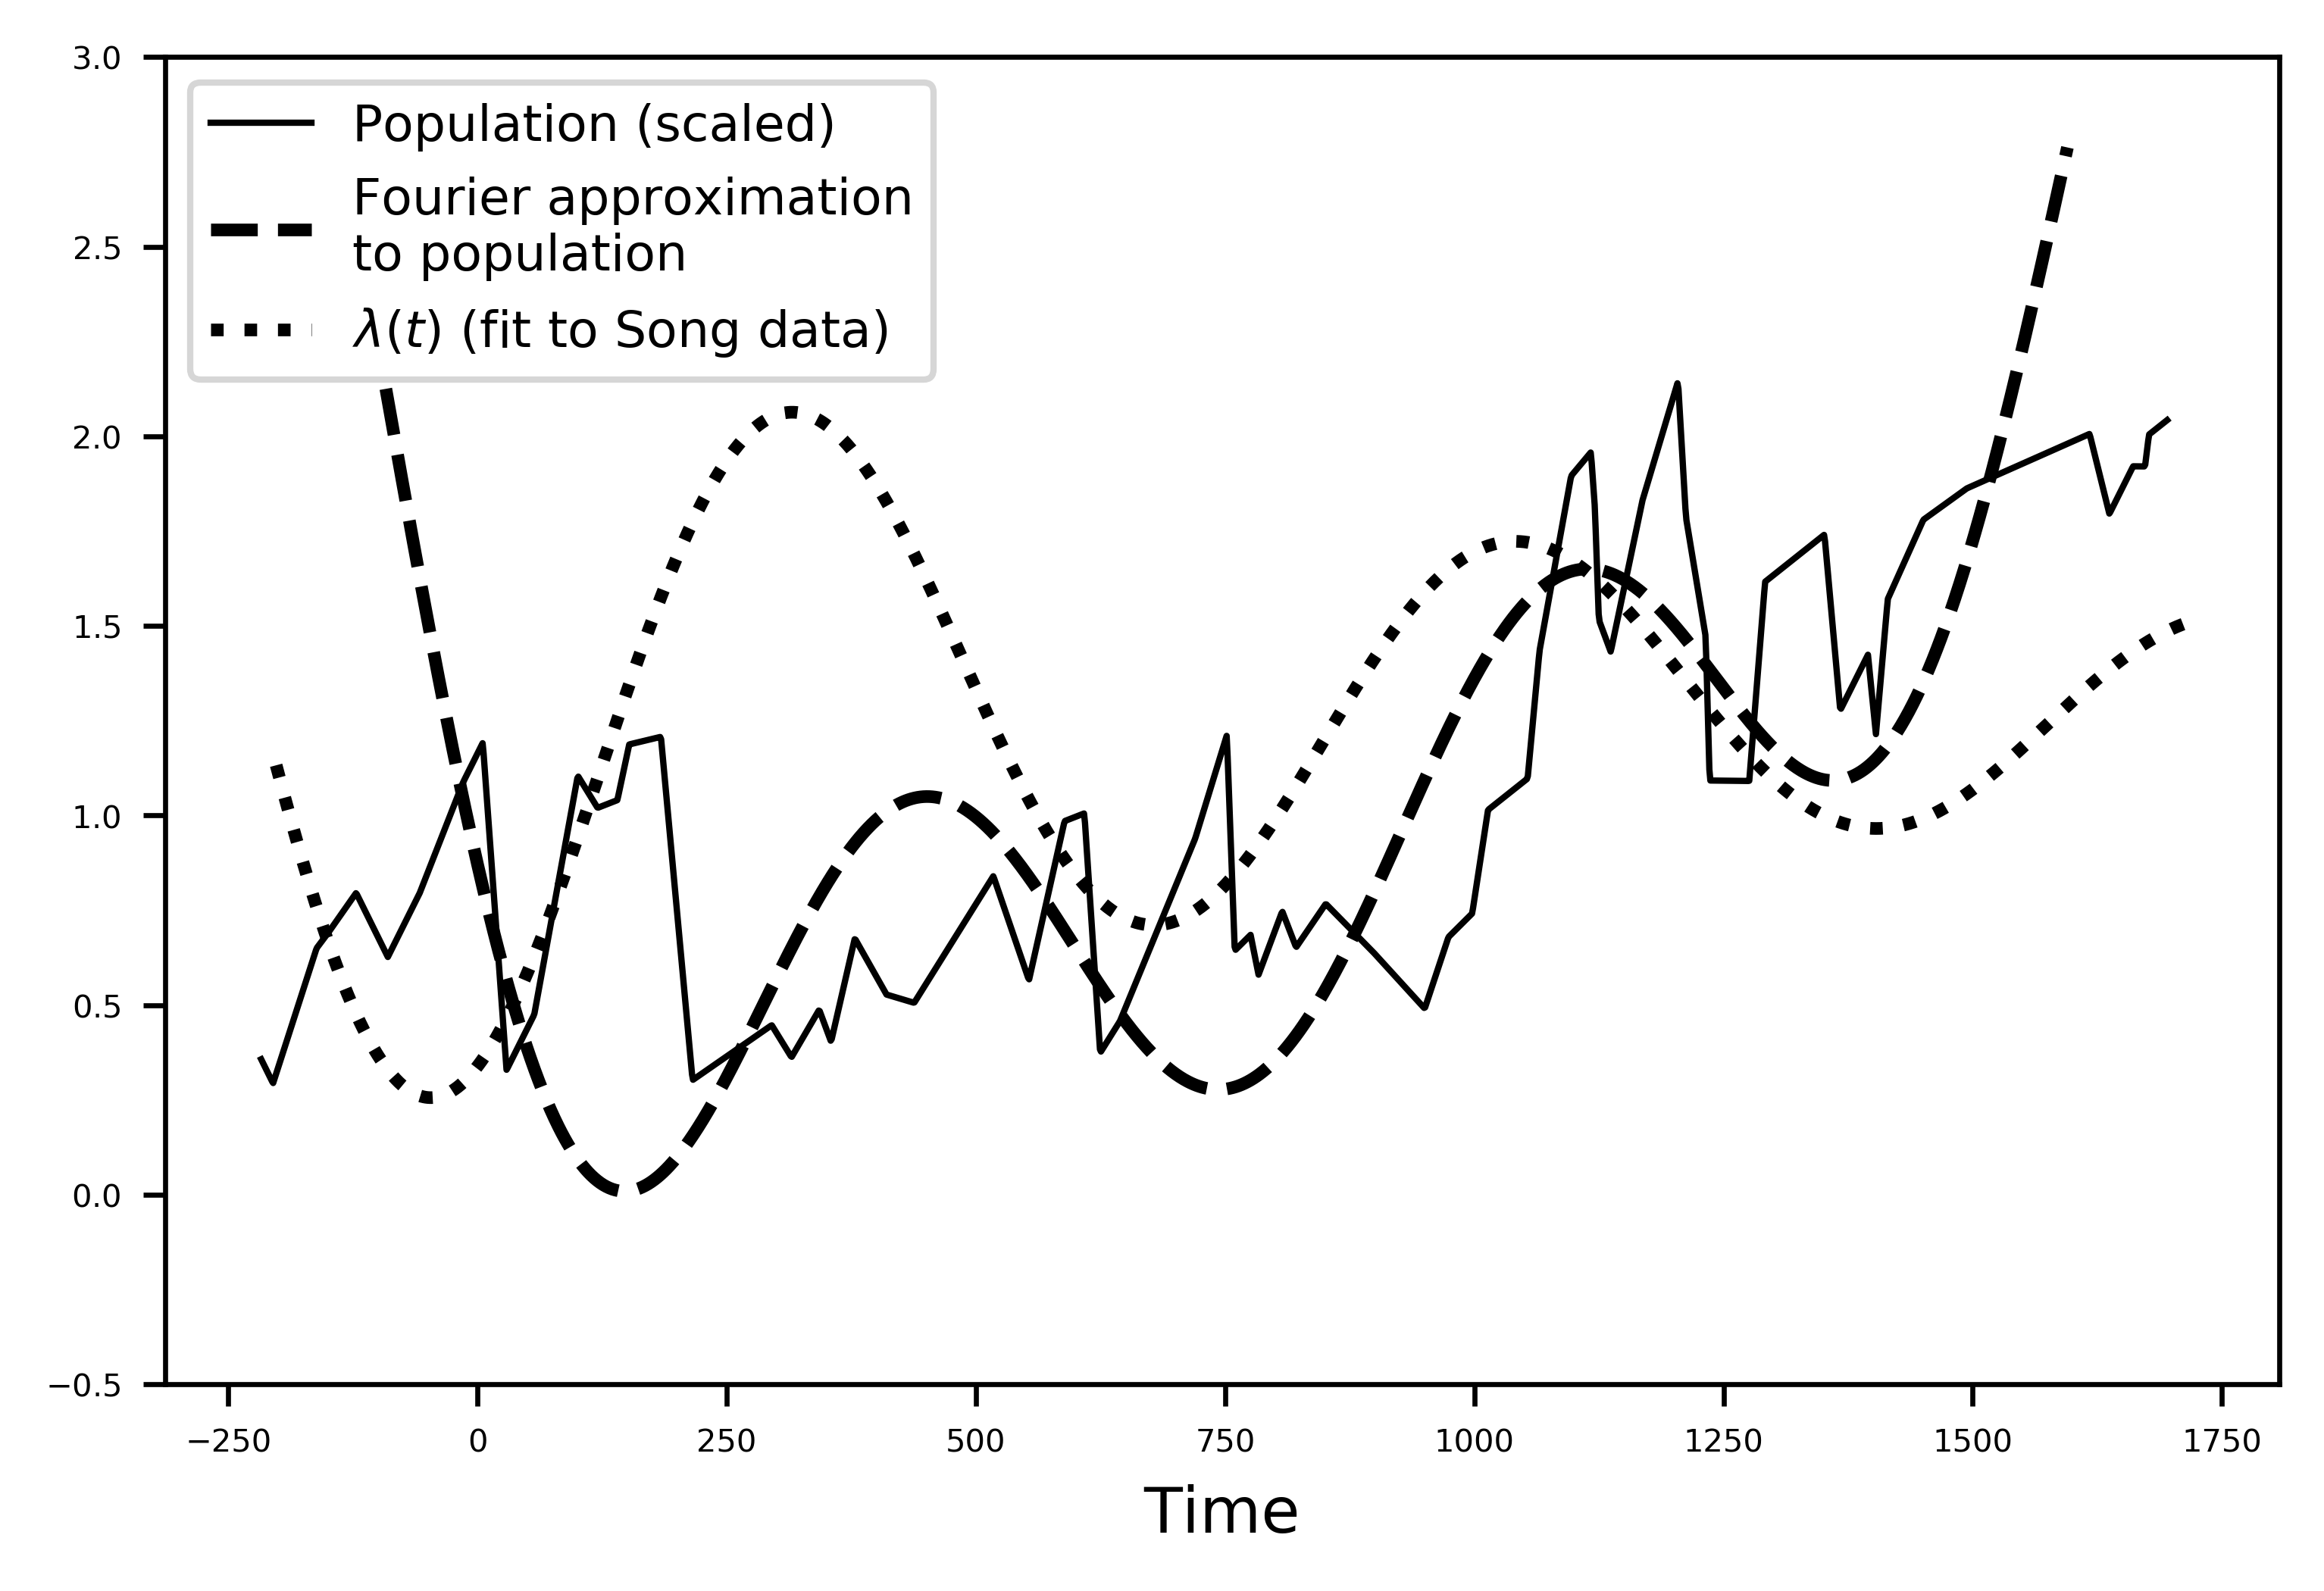

In [161]:
# Comparing population with lambda estimate from Song data
plt.figure(dpi=dpi)
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.gca().set_ylim(-0.5, 3)
plt.plot(time_Population[:-200], x[:-200]/P, c = 'k', linestyle = '-', linewidth=1,
        label = 'Population (scaled)')
plt.plot(time_Population[125:-300], a0/2+xf[125:-300]/P, c = 'k', linestyle = '--', linewidth=2,
        label = 'Fourier approximation\nto population')
plt.plot(time[273:-200], fit_Song[273:-200], c = 'k', linestyle = ':', linewidth=2,
        label = '$\lambda(t)$ (fit to Song data)')
plt.legend(loc = 'upper right', prop={'size': 8})
plt.xlabel('Time', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.legend(loc = 'upper left', prop={'size': 8})
plt.savefig('3a.pdf', bbox_inches = 'tight', pad_inches = 0)

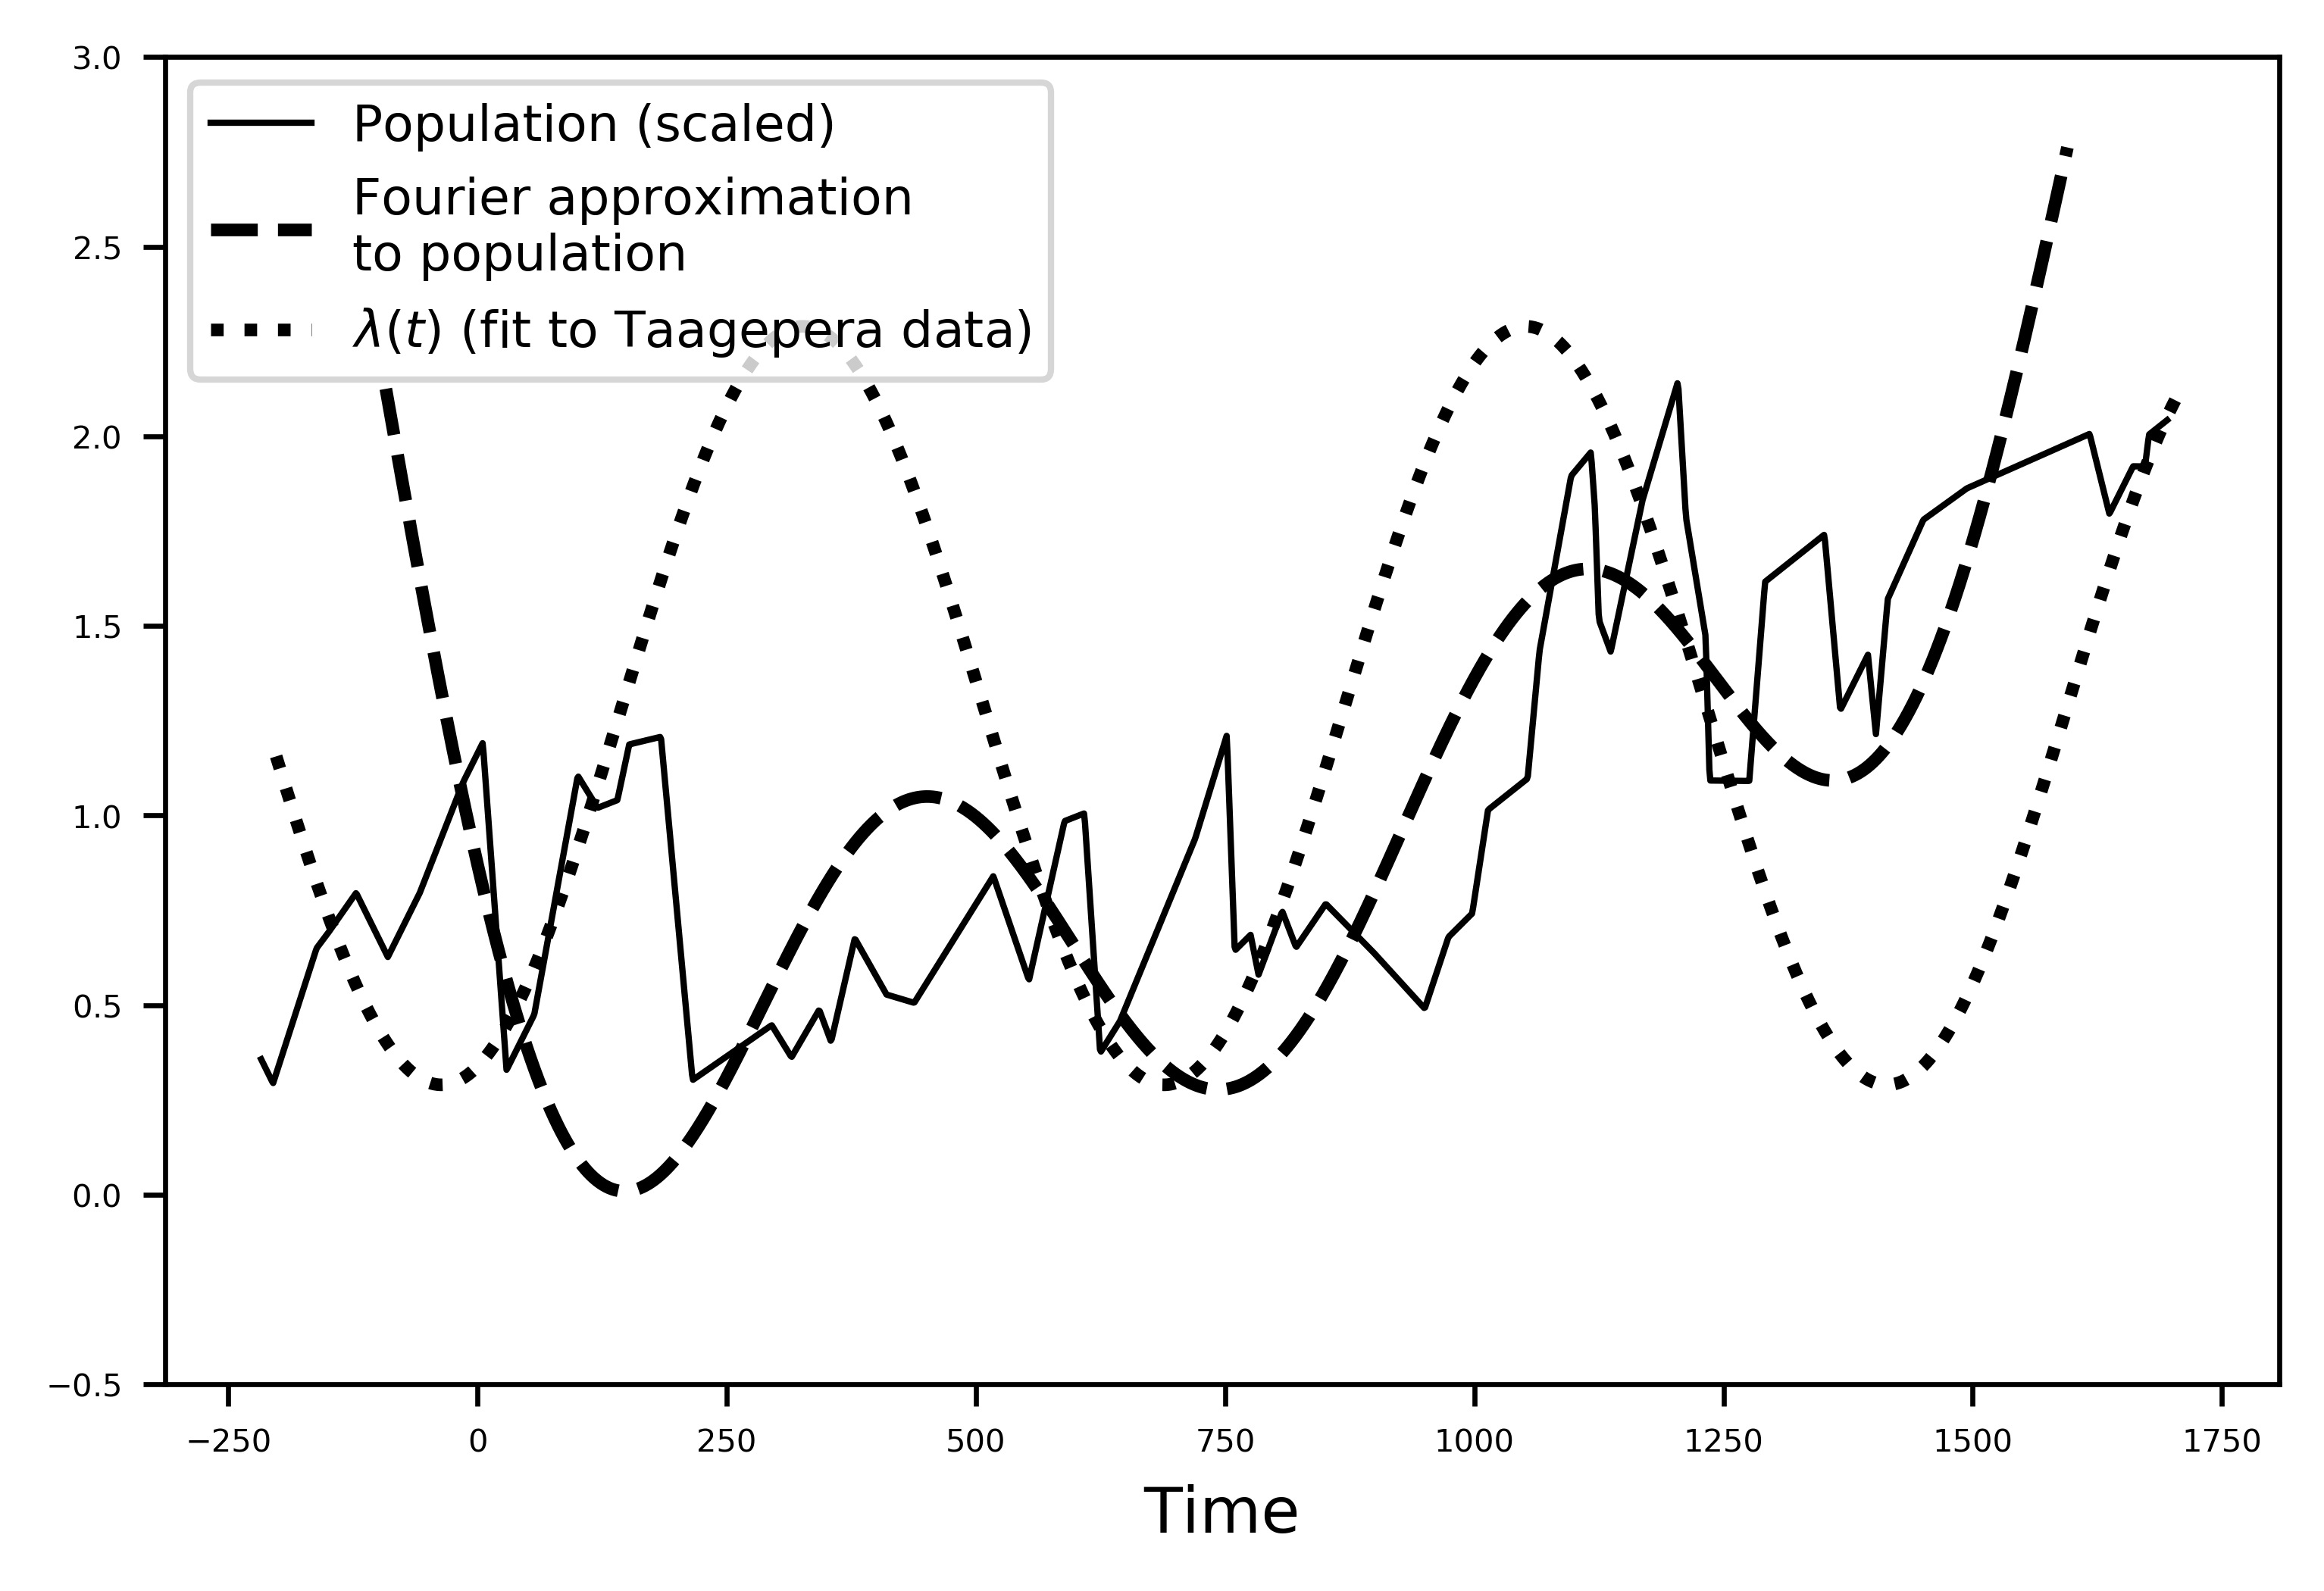

In [162]:
# Comparing population with lambda estimate from Taagepera data
plt.figure(dpi=dpi)
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.gca().set_ylim(-0.5, 3)
plt.plot(time_Population[:-200], x[:-200]/P, c = 'k', linestyle = '-', linewidth=1,
        label = 'Population (scaled)')
plt.plot(time_Population[125:-300], a0/2+xf[125:-300]/P, c = 'k', linestyle = '--', linewidth=2,
        label = 'Fourier approximation\nto population')
plt.plot(time[273:-200], fit_Taagepera[273:-200], c = 'k', linestyle = ':', linewidth=2,
        label = '$\lambda(t)$ (fit to Taagepera data)')
plt.legend(loc = 'upper right', prop={'size': 8})
plt.xlabel('Time', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.legend(loc = 'upper left', prop={'size': 8})
plt.savefig('3b.pdf', bbox_inches = 'tight', pad_inches = 0)